In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
from IPython import display
%matplotlib inline

# Import the datasets for the actual load for Germany and Luxenburg and the load forcast one day ahead 
# https://transparency.entsoe.eu/dashboard/show
df_load_2019 = pd.read_csv('./Desktop/PowerMarketGER/2019/Total Load - Day Ahead _ Actual_201901010000-202001010000.csv', index_col=False)
df_load_2020 = pd.read_csv('./Desktop/PowerMarketGER/2020/Total Load - Day Ahead _ Actual_202001010000-202101010000.csv', index_col=False)
df_load_2021 = pd.read_csv('./Desktop/PowerMarketGER/2021/Total Load - Day Ahead _ Actual_202101010000-202201010000.csv', index_col=False)
df_load_2022 = pd.read_csv('./Desktop/PowerMarketGER/2022/Total Load - Day Ahead _ Actual_202201010000-202301010000.csv', index_col=False)
df_load_2023 = pd.read_csv('./Desktop/PowerMarketGER/2023/Total Load - Day Ahead _ Actual_202301010000-202401010000.csv', index_col=False)

# Check the shape of dataframe
print('The load in year 2019 does have {} rows for every 15 minutes and {} columns.'.format(df_load_2019.shape[0], df_load_2019.shape[1]))

The load in year 2019 does have 35044 rows for every 15 minutes and 3 columns.


In [2]:
# connect the datasets per year to one dataset, the column names are the same
df_load = pd.concat([df_load_2019, df_load_2020, df_load_2021, df_load_2022, df_load_2023], axis=0)
print('From year 2019 to 2023 there are {} rows for every 15 minutes and {} columns'.format(df_load.shape[0], df_load.shape[1]))

From year 2019 to 2023 there are 175316 rows for every 15 minutes and 3 columns


In [3]:
# Have a look at the end of the dataset. Are there values for 2023.12.31? Must be NO
df_load.tail(4)

Time (CET/CEST)  \
35040  31.12.2023 23:00 - 31.12.2023 23:15   
35041  31.12.2023 23:15 - 31.12.2023 23:30   
35042  31.12.2023 23:30 - 31.12.2023 23:45   
35043  31.12.2023 23:45 - 01.01.2024 00:00   

      Day-ahead Total Load Forecast [MW] - BZN|DE-LU  \
35040                                              -   
35041                                              -   
35042                                              -   
35043                                              -   

      Actual Total Load [MW] - BZN|DE-LU  
35040                                  -  
35041                                  -  
35042                                  -  
35043                                  -

In [4]:
# Rename the columes name 
df_load = df_load.rename(columns={'Day-ahead Total Load Forecast [MW] - BZN|DE-LU': 'Load Forecast Day-ahead  [MW]'
                                  , 'Actual Total Load [MW] - BZN|DE-LU' : 'Actual Load [MW]'})

In [5]:
# Import the datasets day-ahead price for GER-LU from 2019-2023
df_price_2019 = pd.read_csv('./Desktop/PowerMarketGER/2019/Day-ahead Prices_201901010000-202001010000.csv', index_col=False)
df_price_2020 = pd.read_csv('./Desktop/PowerMarketGER/2020/Day-ahead Prices_202001010000-202101010000.csv', index_col=False)
df_price_2021 = pd.read_csv('./Desktop/PowerMarketGER/2021/Day-ahead Prices_202101010000-202201010000.csv', index_col=False)
df_price_2022 = pd.read_csv('./Desktop/PowerMarketGER/2022/Day-ahead Prices_202201010000-202301010000.csv', index_col=False)
df_price_2023 = pd.read_csv('./Desktop/PowerMarketGER/2023/Day-ahead Prices_202301010000-202401010000.csv', index_col=False)
print('The price in year 2023 does have {} rows for every 15 minutes and {} columns.'.format(df_price_2023.shape[0], df_price_2023.shape[1]))

The price in year 2023 does have 35044 rows for every 15 minutes and 4 columns.


In [6]:
# Make one dataset for all day-ahead-prices for electrical power in Germany and Luxenburg
df_price = pd.concat([df_price_2019, df_price_2020, df_price_2021, df_price_2022, df_price_2023], axis=0)

In [7]:
# Rename column and remove unneeded columns
# Remove last column
df_price = df_price.drop(['BZN|DE-LU'], axis=1)
# Drop columns whit curreny
df_price = df_price.drop(['Currency'], axis=1)
df_price.head()

MTU (CET/CEST) Day-ahead Price [EUR/MWh]
0  01.01.2019 00:00 - 01.01.2019 00:15                     40.16
1  01.01.2019 00:15 - 01.01.2019 00:30                     27.51
2  01.01.2019 00:30 - 01.01.2019 00:45                     13.84
3  01.01.2019 00:45 - 01.01.2019 01:00                      -1.5
4  01.01.2019 01:00 - 01.01.2019 01:15                     27.62

In [8]:
# Equelaize the name of equal columns over dataframes
df_price = df_price.rename(columns={'MTU (CET/CEST)': 'Price Time (CET/CEST)'})

In [9]:
# Import the dataset for energy generation type in GER & LU
df_prod_type_2019 = pd.read_csv('./Desktop/PowerMarketGER/2019/Actual Generation per Production Type_201901010000-202001010000.csv', index_col=False)
df_prod_type_2020 = pd.read_csv('./Desktop/PowerMarketGER/2020/Actual Generation per Production Type_202001010000-202101010000.csv', index_col=False)
df_prod_type_2021 = pd.read_csv('./Desktop/PowerMarketGER/2021/Actual Generation per Production Type_202101010000-202201010000.csv', index_col=False)
df_prod_type_2022 = pd.read_csv('./Desktop/PowerMarketGER/2022/Actual Generation per Production Type_202201010000-202301010000.csv', index_col=False)
df_prod_type_2023 = pd.read_csv('./Desktop/PowerMarketGER/2023/Actual Generation per Production Type_202301010000-202401010000.csv', index_col=False)

In [10]:
# Make one dataset for all production type for electrical power in Germany and Luxenburg
df_prod_type = pd.concat([df_prod_type_2019, df_prod_type_2020, df_prod_type_2021, df_prod_type_2022, df_prod_type_2023], axis=0)

In [11]:
# Have a look on the data
df_prod_type.head(2)

Area                                             MTU  \
0  BZN|DE-LU  01.01.2019 00:00 - 01.01.2019 00:15 (CET/CEST)   
1  BZN|DE-LU  01.01.2019 00:15 - 01.01.2019 00:30 (CET/CEST)   

  Biomass  - Actual Aggregated [MW]  \
0                            4812.0   
1                            4828.0   

  Fossil Brown coal/Lignite  - Actual Aggregated [MW]  \
0                                             6932.0    
1                                             6351.0    

  Fossil Coal-derived gas  - Actual Aggregated [MW]  \
0                                               273   
1                                               481   

  Fossil Gas  - Actual Aggregated [MW]  \
0                               3410.0   
1                               3295.0   

  Fossil Hard coal  - Actual Aggregated [MW]  \
0                                     3345.0   
1                                     2918.0   

  Fossil Oil  - Actual Aggregated [MW]  \
0                                482.0   
1                                484.0   

  Fossil Oil shale  - Actual Aggregated [MW]  \
0                                        n/e   
1                                        n/e   

  Fossil Peat  - Actual Aggregated [MW]  ...  \
0                                   n/e  ...   
1                                   n/e  ...   

  Hydro Run-of-river and poundage  - Actual Aggregated [MW]  \
0                                             1485.0          
1                                             1484.0          

  Hydro Water Reservoir  - Actual Aggregated [MW]  \
0                                           132.0   
1                                           108.0   

  Marine  - Actual Aggregated [MW] Nuclear  - Actual Aggregated [MW]  \
0                              n/e                            9002.0   
1                              n/e                            9053.0   

  Other  - Actual Aggregated [MW] Other renewable  - Actual Aggregated [MW]  \
0                           475.0                                     107.0   
1                           475.0                                     107.0   

  Solar  - Actual Aggregated [MW] Waste  - Actual Aggregated [MW]  \
0                             0.0                           783.0   
1                             0.0                           772.0   

  Wind Offshore  - Actual Aggregated [MW]  \
0                                  3177.0   
1                                  3174.0   

  Wind Onshore  - Actual Aggregated [MW]  
0                                19366.0  
1                                20132.0  

[2 rows x 23 columns]

In [12]:
# Rename the column with timeframes
df_prod_type = df_prod_type.rename(columns={'MTU': 'Prod Time (CET/CEST)'})

# Check the number of rows
print('The production types from 2019 to 2023 does have {} rows for every 15 minutes and {} columns.\nThat should be equail to the row number of the load dataframe what is {}'.format(df_prod_type.shape[0], df_prod_type.shape[1], df_load.shape[0]))

The production types from 2019 to 2023 does have 175316 rows for every 15 minutes and 23 columns.
That should be equail to the row number of the load dataframe what is 175316


In [13]:
# Give the time column an unique name
df_prod_type['Prod Time (CET/CEST)'] = df_prod_type['Prod Time (CET/CEST)'].str.replace('CET/CEST', '')

# Remove the additional infromation in the timeframe column
df_prod_type['Prod Time (CET/CEST)'] = df_prod_type['Prod Time (CET/CEST)'].str.replace('(', '', regex=True)
df_prod_type['Prod Time (CET/CEST)'] = df_prod_type['Prod Time (CET/CEST)'].str.replace(')', '', regex=True)

# Check the timeframe syntax by showing the first hour
df_prod_type['Prod Time (CET/CEST)'].head(4)

0    01.01.2019 00:00 - 01.01.2019 00:15 
1    01.01.2019 00:15 - 01.01.2019 00:30 
2    01.01.2019 00:30 - 01.01.2019 00:45 
3    01.01.2019 00:45 - 01.01.2019 01:00 
Name: Prod Time (CET/CEST), dtype: object

In [14]:
# Create one dataframe what includes all the data
df = pd.concat([df_load, df_price, df_prod_type], axis=1)

In [15]:
# Drop columns to have only one with the the same infromation
df = df.drop(['Price Time (CET/CEST)', 'Prod Time (CET/CEST)'], axis=1)
df.head(2)

Time (CET/CEST) Load Forecast Day-ahead  [MW]  \
0  01.01.2019 00:00 - 01.01.2019 00:15                       44216.0   
1  01.01.2019 00:15 - 01.01.2019 00:30                       44008.0   

  Actual Load [MW] Day-ahead Price [EUR/MWh]       Area  \
0          44383.0                     40.16  BZN|DE-LU   
1          43911.0                     27.51  BZN|DE-LU   

  Biomass  - Actual Aggregated [MW]  \
0                            4812.0   
1                            4828.0   

  Fossil Brown coal/Lignite  - Actual Aggregated [MW]  \
0                                             6932.0    
1                                             6351.0    

  Fossil Coal-derived gas  - Actual Aggregated [MW]  \
0                                               273   
1                                               481   

  Fossil Gas  - Actual Aggregated [MW]  \
0                               3410.0   
1                               3295.0   

  Fossil Hard coal  - Actual Aggregated [MW]  ...  \
0                                     3345.0  ...   
1                                     2918.0  ...   

  Hydro Run-of-river and poundage  - Actual Aggregated [MW]  \
0                                             1485.0          
1                                             1484.0          

  Hydro Water Reservoir  - Actual Aggregated [MW]  \
0                                           132.0   
1                                           108.0   

  Marine  - Actual Aggregated [MW] Nuclear  - Actual Aggregated [MW]  \
0                              n/e                            9002.0   
1                              n/e                            9053.0   

  Other  - Actual Aggregated [MW] Other renewable  - Actual Aggregated [MW]  \
0                           475.0                                     107.0   
1                           475.0                                     107.0   

  Solar  - Actual Aggregated [MW] Waste  - Actual Aggregated [MW]  \
0                             0.0                           783.0   
1                             0.0                           772.0   

  Wind Offshore  - Actual Aggregated [MW]  \
0                                  3177.0   
1                                  3174.0   

  Wind Onshore  - Actual Aggregated [MW]  
0                                19366.0  
1                                20132.0  

[2 rows x 26 columns]

In [16]:
# Check the shape of the final dataframe (number of rows)
print('The joined dataframe does have {} rows and {} columns. Some of the colums might be droped.'.format(df.shape[0], df.shape[1]))

The joined dataframe does have 175316 rows and 26 columns. Some of the colums might be droped.


In [17]:
# Drop unneeded columns. Because we defined the scoupe to German data we can dorp the area column.
df = df.drop(['Area'], axis=1)

In [18]:
# Check the dataframe for NaN values.
df.isna().sum()

Time (CET/CEST)                                                0
Load Forecast Day-ahead  [MW]                                308
Actual Load [MW]                                              23
Day-ahead Price [EUR/MWh]                                    320
Biomass  - Actual Aggregated [MW]                            212
Fossil Brown coal/Lignite  - Actual Aggregated [MW]           20
Fossil Coal-derived gas  - Actual Aggregated [MW]             20
Fossil Gas  - Actual Aggregated [MW]                          20
Fossil Hard coal  - Actual Aggregated [MW]                    20
Fossil Oil  - Actual Aggregated [MW]                          20
Fossil Oil shale  - Actual Aggregated [MW]                    20
Fossil Peat  - Actual Aggregated [MW]                         20
Geothermal  - Actual Aggregated [MW]                          21
Hydro Pumped Storage  - Actual Aggregated [MW]                20
Hydro Pumped Storage  - Actual Consumption [MW]               20
Hydro Run-of-river and po

In [19]:
# Replace all the characters what should represent NaN alues by real pandas NaN values 
df = df.replace('n/e', np.nan)
df.tail(2)

Time (CET/CEST) Load Forecast Day-ahead  [MW]  \
35042  31.12.2023 23:30 - 31.12.2023 23:45                             -   
35043  31.12.2023 23:45 - 01.01.2024 00:00                             -   

      Actual Load [MW] Day-ahead Price [EUR/MWh]  \
35042                -                         -   
35043                -                         -   

      Biomass  - Actual Aggregated [MW]  \
35042                                 -   
35043                                 -   

      Fossil Brown coal/Lignite  - Actual Aggregated [MW]  \
35042                                                  -    
35043                                                  -    

      Fossil Coal-derived gas  - Actual Aggregated [MW]  \
35042                                               NaN   
35043                                               NaN   

      Fossil Gas  - Actual Aggregated [MW]  \
35042                                    -   
35043                                    -   

      Fossil Hard coal  - Actual Aggregated [MW]  \
35042                                          -   
35043                                          -   

      Fossil Oil  - Actual Aggregated [MW]  ...  \
35042                                    -  ...   
35043                                    -  ...   

       Hydro Run-of-river and poundage  - Actual Aggregated [MW]  \
35042                                                  -           
35043                                                  -           

       Hydro Water Reservoir  - Actual Aggregated [MW]  \
35042                                                -   
35043                                                -   

      Marine  - Actual Aggregated [MW] Nuclear  - Actual Aggregated [MW]  \
35042                              NaN                                 -   
35043                              NaN                                 -   

      Other  - Actual Aggregated [MW]  \
35042                               -   
35043                               -   

      Other renewable  - Actual Aggregated [MW]  \
35042                                         -   
35043                                         -   

      Solar  - Actual Aggregated [MW]  Waste  - Actual Aggregated [MW]  \
35042                               -                                -   
35043                               -                                -   

      Wind Offshore  - Actual Aggregated [MW]  \
35042                                       -   
35043                                       -   

      Wind Onshore  - Actual Aggregated [MW]  
35042                                      -  
35043                                      -  

[2 rows x 25 columns]

In [20]:
# Replace '-' with Data what it represents (NaN) but be aware for the timeframes 
adjustable_columns = df.columns.difference(['Time (CET/CEST)'])
df[adjustable_columns] = df[adjustable_columns].replace(to_replace=r'-', value=np.nan, regex=True)
df.isna().sum()

Time (CET/CEST)                                                   0
Load Forecast Day-ahead  [MW]                                 28244
Actual Load [MW]                                              28082
Day-ahead Price [EUR/MWh]                                     29033
Biomass  - Actual Aggregated [MW]                             28270
Fossil Brown coal/Lignite  - Actual Aggregated [MW]           28077
Fossil Coal-derived gas  - Actual Aggregated [MW]            154392
Fossil Gas  - Actual Aggregated [MW]                          28078
Fossil Hard coal  - Actual Aggregated [MW]                    28077
Fossil Oil  - Actual Aggregated [MW]                          28077
Fossil Oil shale  - Actual Aggregated [MW]                   175316
Fossil Peat  - Actual Aggregated [MW]                        175316
Geothermal  - Actual Aggregated [MW]                          28078
Hydro Pumped Storage  - Actual Aggregated [MW]                28077
Hydro Pumped Storage  - Actual Consumption [MW] 

In [21]:
# Replace '[]' to make it easier to perform operations.
df.columns = df.columns.str.replace('[', 'in ', regex=True)
df.columns = df.columns.str.replace(']', '', regex=True)

In [22]:
# Remove all rows what only show NaN values excluded the first column
df = df.dropna(axis=0, thresh=20) 
df.isna().sum()

Time (CET/CEST)                                                    0
Load Forecast Day-ahead  in MW                                   192
Actual Load in MW                                                  3
Day-ahead Price in EUR/MWh                                      1052
Biomass  - Actual Aggregated in MW                               167
Fossil Brown coal/Lignite  - Actual Aggregated in MW               0
Fossil Coal-derived gas  - Actual Aggregated in MW            126288
Fossil Gas  - Actual Aggregated in MW                              0
Fossil Hard coal  - Actual Aggregated in MW                        0
Fossil Oil  - Actual Aggregated in MW                              0
Fossil Oil shale  - Actual Aggregated in MW                   147212
Fossil Peat  - Actual Aggregated in MW                        147212
Geothermal  - Actual Aggregated in MW                              1
Hydro Pumped Storage  - Actual Aggregated in MW                    0
Hydro Pumped Storage  - Actual Con

In [23]:
# Check if there are less rows than befor
print('The now dataframe has {} rows. Because for 2023 there where many nan rows.'.format(df.shape[0]))

The now dataframe has 147212 rows. Because for 2023 there where many nan rows.


In [24]:
# Remove all columns whtat only contain zero values
df = df.drop(columns=['Fossil Oil shale  - Actual Aggregated in MW'
    , 'Fossil Peat  - Actual Aggregated in MW'
    , 'Marine  - Actual Aggregated in MW'], axis=1)

In [25]:
# Check the dataframe if it is good setup to work with
df.isna().sum()

Time (CET/CEST)                                                    0
Load Forecast Day-ahead  in MW                                   192
Actual Load in MW                                                  3
Day-ahead Price in EUR/MWh                                      1052
Biomass  - Actual Aggregated in MW                               167
Fossil Brown coal/Lignite  - Actual Aggregated in MW               0
Fossil Coal-derived gas  - Actual Aggregated in MW            126288
Fossil Gas  - Actual Aggregated in MW                              0
Fossil Hard coal  - Actual Aggregated in MW                        0
Fossil Oil  - Actual Aggregated in MW                              0
Geothermal  - Actual Aggregated in MW                              1
Hydro Pumped Storage  - Actual Aggregated in MW                    0
Hydro Pumped Storage  - Actual Consumption in MW                   0
Hydro Run-of-river and poundage  - Actual Aggregated in MW         0
Hydro Water Reservoir  - Actual Ag

In [26]:
# Check if there are any NaN values in Actual Load
df_load_nan = df[df['Actual Load in MW'].isna() == True]
df_load_nan

Time (CET/CEST) Load Forecast Day-ahead  in MW  \
6979  14.03.2023 16:45 - 14.03.2023 17:00                          65157   
6980  14.03.2023 17:00 - 14.03.2023 17:15                          65368   
6981  14.03.2023 17:15 - 14.03.2023 17:30                          65830   

     Actual Load in MW Day-ahead Price in EUR/MWh  \
6979               NaN                     124.91   
6980               NaN                      16.60   
6981               NaN                      89.92   

     Biomass  - Actual Aggregated in MW  \
6979                               4692   
6980                               4698   
6981                               4699   

     Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
6979                                               7709     
6980                                               7753     
6981                                               7934     

     Fossil Coal-derived gas  - Actual Aggregated in MW  \
6979                                                NaN   
6980                                                NaN   
6981                                                NaN   

     Fossil Gas  - Actual Aggregated in MW  \
6979                                  4924   
6980                                  5460   
6981                                  5478   

     Fossil Hard coal  - Actual Aggregated in MW  \
6979                                        5596   
6980                                        5987   
6981                                        6201   

     Fossil Oil  - Actual Aggregated in MW  ...  \
6979                                     8  ...   
6980                                     8  ...   
6981                                     8  ...   

     Hydro Pumped Storage  - Actual Consumption in MW  \
6979                                             1082   
6980                                              888   
6981                                              126   

     Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
6979                                               1509           
6980                                               1522           
6981                                               1534           

     Hydro Water Reservoir  - Actual Aggregated in MW  \
6979                                               64   
6980                                               48   
6981                                               13   

     Nuclear  - Actual Aggregated in MW Other  - Actual Aggregated in MW  \
6979                               2882                              279   
6980                               2882                              307   
6981                               2884                              319   

     Other renewable  - Actual Aggregated in MW  \
6979                                        145   
6980                                        157   
6981                                        163   

     Solar  - Actual Aggregated in MW Waste  - Actual Aggregated in MW  \
6979                             3575                              804   
6980                             2728                              799   
6981                             1896                              793   

     Wind Offshore  - Actual Aggregated in MW  \
6979                                     3450   
6980                                     3319   
6981                                     3308   

     Wind Onshore  - Actual Aggregated in MW  
6979                                   35913  
6980                                   35534  
6981                                   34444  

[3 rows x 22 columns]

In [27]:
# In that case to deal with NaN values sum it up over the load type would be an appropriated  approach.
# Anyway as we can see the the NaN values are only on the last day of dataset and that will be removed to have a day to day
# comparison. 

In [28]:
# Check data types of values
df.dtypes

Time (CET/CEST)                                               object
Load Forecast Day-ahead  in MW                                object
Actual Load in MW                                             object
Day-ahead Price in EUR/MWh                                    object
Biomass  - Actual Aggregated in MW                            object
Fossil Brown coal/Lignite  - Actual Aggregated in MW          object
Fossil Coal-derived gas  - Actual Aggregated in MW            object
Fossil Gas  - Actual Aggregated in MW                         object
Fossil Hard coal  - Actual Aggregated in MW                   object
Fossil Oil  - Actual Aggregated in MW                         object
Geothermal  - Actual Aggregated in MW                         object
Hydro Pumped Storage  - Actual Aggregated in MW               object
Hydro Pumped Storage  - Actual Consumption in MW              object
Hydro Run-of-river and poundage  - Actual Aggregated in MW    object
Hydro Water Reservoir  - Actual Ag

In [31]:
# Typecast values from objects to numbers exclude the time column
typecast_columns = df.columns.difference(['Time (CET/CEST)'])
for i in typecast_columns: 
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [32]:
# Check data types
df.dtypes

Time (CET/CEST)                                                object
Load Forecast Day-ahead  in MW                                float64
Actual Load in MW                                             float64
Day-ahead Price in EUR/MWh                                    float64
Biomass  - Actual Aggregated in MW                            float64
Fossil Brown coal/Lignite  - Actual Aggregated in MW          float64
Fossil Coal-derived gas  - Actual Aggregated in MW            float64
Fossil Gas  - Actual Aggregated in MW                         float64
Fossil Hard coal  - Actual Aggregated in MW                   float64
Fossil Oil  - Actual Aggregated in MW                         float64
Geothermal  - Actual Aggregated in MW                         float64
Hydro Pumped Storage  - Actual Aggregated in MW               float64
Hydro Pumped Storage  - Actual Consumption in MW              float64
Hydro Run-of-river and poundage  - Actual Aggregated in MW    float64
Hydro Water Reservoi

In [33]:
# How to deal with the Hydro Pumped Storage  - Actual Consumption in MW column? Turn the values into negativ aggreagtion
df['Hydro Pumped Storage  - Actual Consumption in MW'] = -df['Hydro Pumped Storage  - Actual Consumption in MW']

In [34]:
# Typecast the fist column into a string
df['Time (CET/CEST)'] = df['Time (CET/CEST)'].astype(pd.StringDtype())

In [35]:
# Split the column time (time-frame value) into start and end time
# 1) split up on '-'
df[['Time_Start', 'Time_End']] = df['Time (CET/CEST)'].str.split(' - ', expand=True)

In [33]:
# Show head() to decide over furhter actions
df.head(2)

Time (CET/CEST)  Load Forecast Day-ahead  in MW  \
0  01.01.2019 00:00 - 01.01.2019 00:15                         44216.0   
1  01.01.2019 00:15 - 01.01.2019 00:30                         44008.0   

   Actual Load in MW  Day-ahead Price in EUR/MWh  \
0            44383.0                       40.16   
1            43911.0                       27.51   

   Biomass  - Actual Aggregated in MW  \
0                              4812.0   
1                              4828.0   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                             6932.0      
1                                             6351.0      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                              273.0    
1                                              481.0    

   Fossil Gas  - Actual Aggregated in MW  \
0                                 3410.0   
1                                 3295.0   

   Fossil Hard coal  - Actual Aggregated in MW  \
0                                       3345.0   
1                                       2918.0   

   Fossil Oil  - Actual Aggregated in MW  ...  \
0                                  482.0  ...   
1                                  484.0  ...   

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                             132.0   
1                                             108.0   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                              9002.0                             475.0   
1                              9053.0                             475.0   

   Other renewable  - Actual Aggregated in MW  \
0                                       107.0   
1                                       107.0   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                               0.0                             783.0   
1                               0.0                             772.0   

   Wind Offshore  - Actual Aggregated in MW  \
0                                    3177.0   
1                                    3174.0   

   Wind Onshore  - Actual Aggregated in MW        Time_Start          Time_End  
0                                  19366.0  01.01.2019 00:00  01.01.2019 00:15  
1                                  20132.0  01.01.2019 00:15  01.01.2019 00:30  

[2 rows x 24 columns]

In [36]:
# Now we have three columns with a time value
# Becoause the Time_Start value of the next row is equal to the Time_End value this column can be droped 
df = df.drop(columns='Time_End', axis=1)

# Swap Time (CET/CEST) and Time_Start
col_order = list(df.columns)
first, last = col_order.index('Time (CET/CEST)'), col_order.index('Time_Start')
col_order[last], col_order[first] = col_order[first], col_order[last]
df = df[col_order]

# Drop last column because with every time a new data entray for 15 minutes will start, e.g. from 00:00: to 00:14:59, 15:00 to 00:29:59
df = df.drop('Time (CET/CEST)', axis=1)

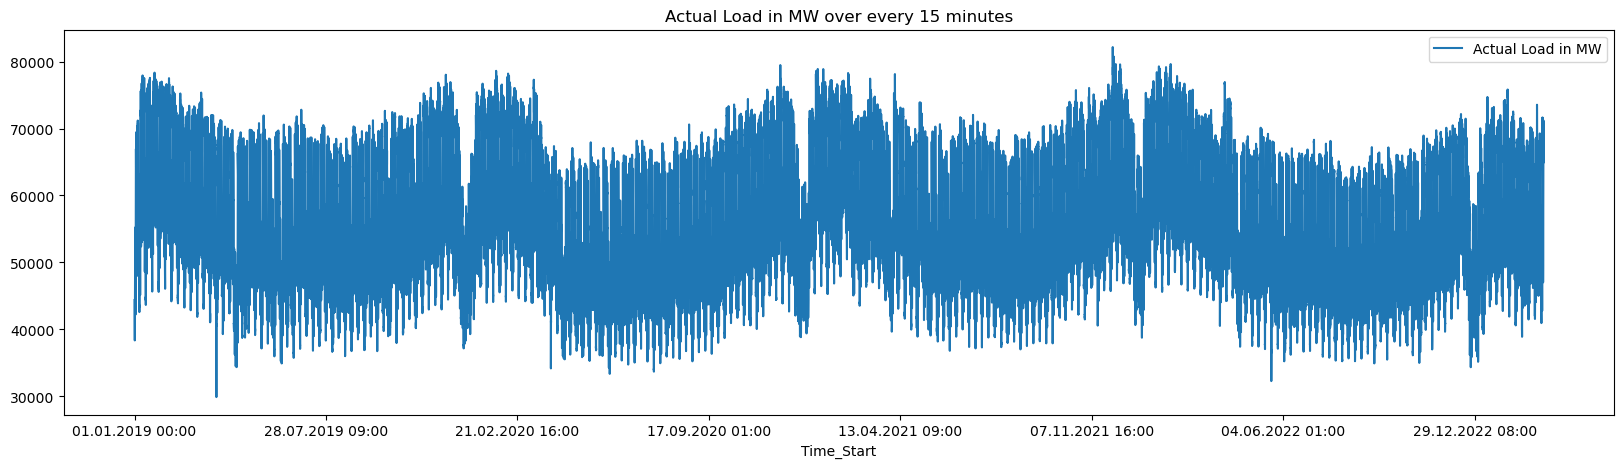

Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
6040   03.03.2020 22:00                         60733.0            61022.0   
2618   28.01.2022 06:30                         66082.0            68818.0   
27350  12.10.2019 21:30                         49473.0            50091.0   

       Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
6040                        49.01                              4663.0   
2618                       156.95                              4615.0   
27350                       37.52                              4796.0   

       Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
6040                                             13010.0      
2618                                             10992.0      
27350                                            10385.0      

       Fossil Coal-derived gas  - Actual Aggregated in MW  \
6040                                                 NaN    
2618                                                 NaN    
27350                                                NaN    

       Fossil Gas  - Actual Aggregated in MW  \
6040                                 10528.0   
2618                                  4998.0   
27350                                 5610.0   

       Fossil Hard coal  - Actual Aggregated in MW  \
6040                                        9140.0   
2618                                        7903.0   
27350                                       1658.0   

       Fossil Oil  - Actual Aggregated in MW  ...  \
6040                                   436.0  ...   
2618                                   287.0  ...   
27350                                  463.0  ...   

       Hydro Pumped Storage  - Actual Consumption in MW  \
6040                                             -844.0   
2618                                             -930.0   
27350                                            -432.0   

       Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
6040                                              1812.0            
2618                                              1035.0            
27350                                             1606.0            

       Hydro Water Reservoir  - Actual Aggregated in MW  \
6040                                              163.0   
2618                                              144.0   
27350                                              55.0   

       Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
6040                               8048.0                             465.0   
2618                               4084.0                             314.0   
27350                              9176.0                             291.0   

       Other renewable  - Actual Aggregated in MW  \
6040                                        192.0   
2618                                        148.0   
27350                                       152.0   

       Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
6040                                0.0                             777.0   
2618                                0.0                             696.0   
27350                               0.0                             899.0   

       Wind Offshore  - Actual Aggregated in MW  \
6040                                      770.0   
2618                                     4661.0   
27350                                    3119.0   

       Wind Onshore  - Actual Aggregated in MW  
6040                                   10940.0  
2618                                   31473.0  
27350                                  12208.0  

[3 rows x 22 columns]

In [38]:
# A first visuel view on the data could be usefull.
df_helper = df # just in case something will went wrong. 

# Polt a line chart of the actual load.
df.plot('Time_Start', 'Actual Load in MW', title='Actual Load in MW over every 15 minutes', figsize=(20, 5))
plt.show()
df.sample(3)

In [40]:
# To use the advatage ov pre-defined data structures with date and time convert the date-time
df['Time_Start'] = pd.to_datetime(df['Time_Start'], format= '%d.%m.%Y %H:%M')

In [41]:
# Now it makes sense to for the analysis to delete the the last day -> that all weeks are total
shape_w = df.shape[0]
df = df[pd.to_datetime(df['Time_Start']) < '2023-03-14']
shape_wo = df.shape[0]
diff = shape_w -shape_wo
print('The number of rows droped from {} to {} by {}.'.format(shape_w, shape_wo, diff))

The number of rows droped from 147212 to 147142 by 70.


In [42]:
# Now theTime_Start value for the last row should be 2023-03-13 23:45:00
df.tail(1)

Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
6911 2023-03-13 23:45:00                         54080.0            53043.0   

      Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
6911                        5.23                              4826.0   

      Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
6911                                             4433.0      

      Fossil Coal-derived gas  - Actual Aggregated in MW  \
6911                                                NaN    

      Fossil Gas  - Actual Aggregated in MW  \
6911                                 3751.0   

      Fossil Hard coal  - Actual Aggregated in MW  \
6911                                       4753.0   

      Fossil Oil  - Actual Aggregated in MW  ...  \
6911                                    8.0  ...   

      Hydro Pumped Storage  - Actual Consumption in MW  \
6911                                           -4539.0   

      Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
6911                                             1084.0            

      Hydro Water Reservoir  - Actual Aggregated in MW  \
6911                                              25.0   

      Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
6911                              2870.0                             212.0   

      Other renewable  - Actual Aggregated in MW  \
6911                                       112.0   

      Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
6911                               0.0                             813.0   

      Wind Offshore  - Actual Aggregated in MW  \
6911                                    4457.0   

      Wind Onshore  - Actual Aggregated in MW  
6911                                  32212.0  

[1 rows x 22 columns]

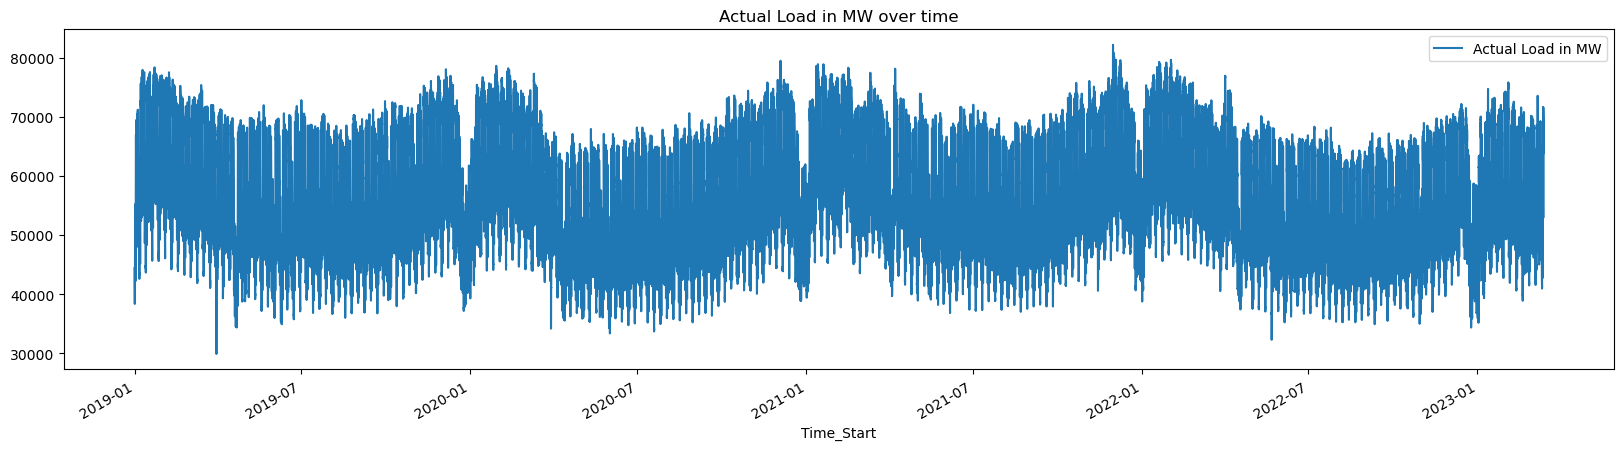

Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
6909 2023-03-13 23:15:00                         55434.0            54533.0   
6910 2023-03-13 23:30:00                         54680.0            53797.0   
6911 2023-03-13 23:45:00                         54080.0            53043.0   

      Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
6909                       20.64                              4860.0   
6910                        5.66                              4848.0   
6911                        5.23                              4826.0   

      Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
6909                                             4414.0      
6910                                             4383.0      
6911                                             4433.0      

      Fossil Coal-derived gas  - Actual Aggregated in MW  \
6909                                                NaN    
6910                                                NaN    
6911                                                NaN    

      Fossil Gas  - Actual Aggregated in MW  \
6909                                 3801.0   
6910                                 3776.0   
6911                                 3751.0   

      Fossil Hard coal  - Actual Aggregated in MW  \
6909                                       4834.0   
6910                                       4781.0   
6911                                       4753.0   

      Fossil Oil  - Actual Aggregated in MW  ...  \
6909                                    8.0  ...   
6910                                    8.0  ...   
6911                                    8.0  ...   

      Hydro Pumped Storage  - Actual Consumption in MW  \
6909                                           -3113.0   
6910                                           -4032.0   
6911                                           -4539.0   

      Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
6909                                             1084.0            
6910                                             1085.0            
6911                                             1084.0            

      Hydro Water Reservoir  - Actual Aggregated in MW  \
6909                                              50.0   
6910                                              85.0   
6911                                              25.0   

      Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
6909                              2872.0                             218.0   
6910                              2869.0                             216.0   
6911                              2870.0                             212.0   

      Other renewable  - Actual Aggregated in MW  \
6909                                       115.0   
6910                                       114.0   
6911                                       112.0   

      Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
6909                               0.0                             857.0   
6910                               0.0                             848.0   
6911                               0.0                             813.0   

      Wind Offshore  - Actual Aggregated in MW  \
6909                                    4453.0   
6910                                    4462.0   
6911                                    4457.0   

      Wind Onshore  - Actual Aggregated in MW  
6909                                  33028.0  
6910                                  32657.0  
6911                                  32212.0  

[3 rows x 22 columns]

In [43]:
# Show a plot of data with day-date as columns value. 
df.plot('Time_Start', 'Actual Load in MW', title='Actual Load in MW over time', figsize=(20, 5))
plt.show()
df.tail(3)

In [44]:
# As a question of interest we would like to know how many times the day-ahead price is negative
# On how many data points the price is negative? 
nb_neg_dap = np.sum((df['Day-ahead Price in EUR/MWh'] < 0).values.ravel()) #df['Day-ahead Price in EUR/MWh'].lt(0).sum()
min_dap = df['Day-ahead Price in EUR/MWh'].min()
dap_per =  nb_neg_dap/df.shape[0]*100
print('There are {} negative prices in {:.2f}% and minimum of {} EUR/MW between 2019 and 2023.'.format(nb_neg_dap, dap_per, min_dap))

There are 3908 negative prices in 2.66% and minimum of -149.99 EUR/MW between 2019 and 2023.


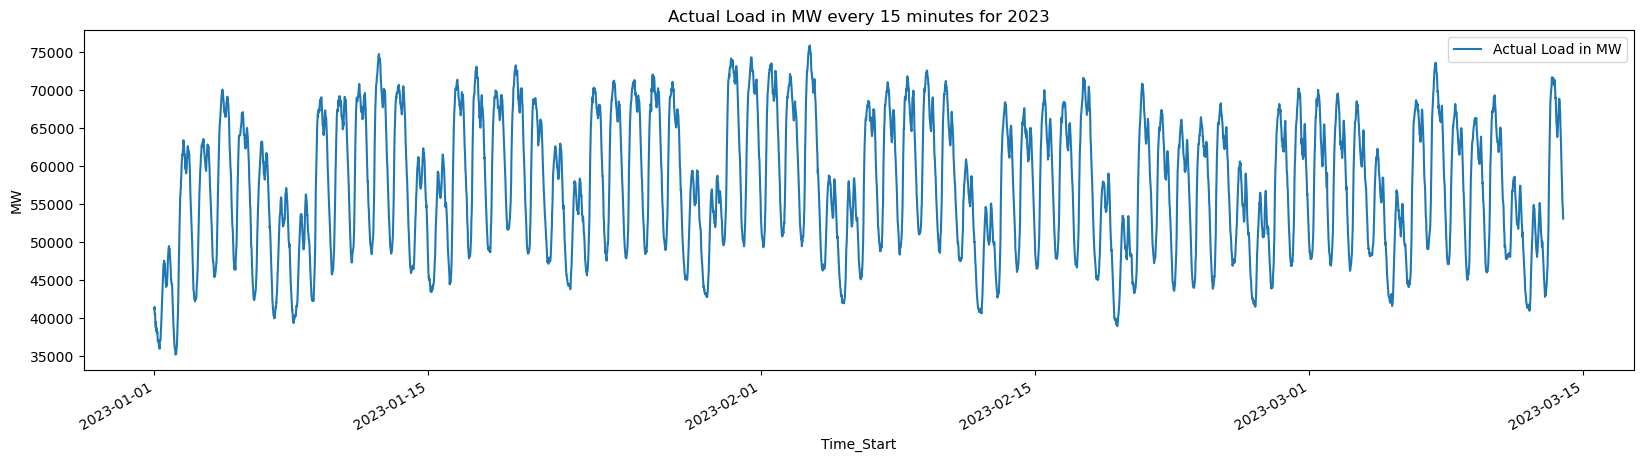

In [47]:
# Create subsets for every year this could be made in a different order started above
df_2019 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2019]
df_2020 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2020]
df_2021 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2021]
df_2022 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2022]
df_2023 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2023]

# Have a detailed view on 2023 until the 14.03.2023
df_2023.plot('Time_Start', 'Actual Load in MW', title='Actual Load in MW every 15 minutes for 2023', figsize=(20, 5))
plt.ylabel('MW')
plt.show()


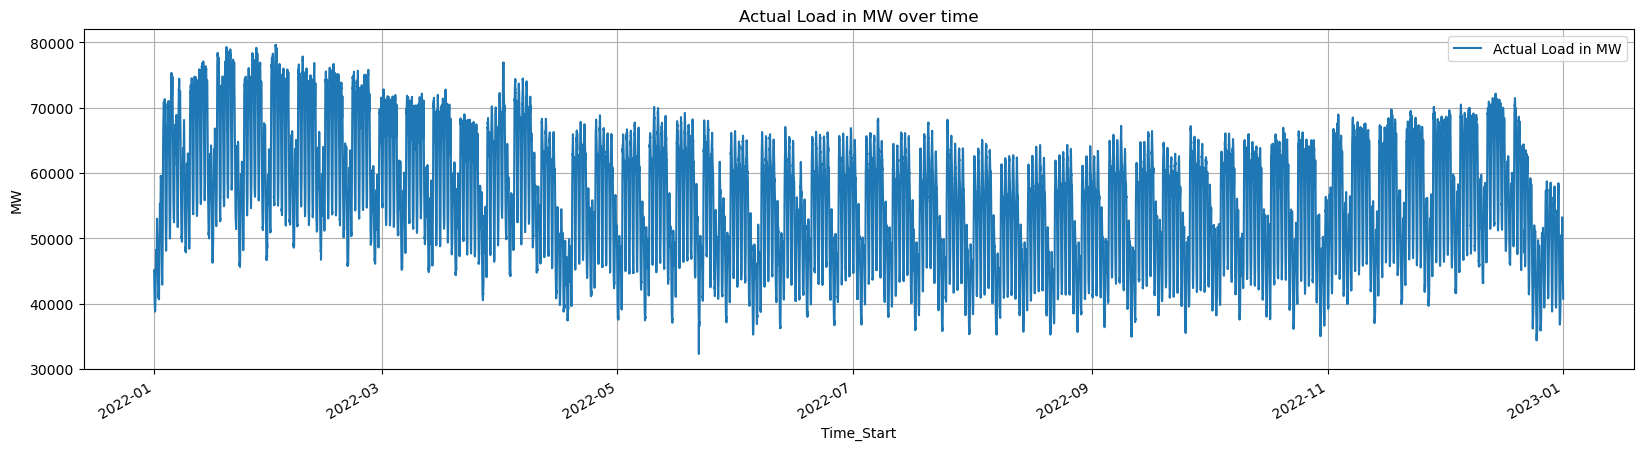

In [48]:
# Detailed view on 2022
df_2022.plot('Time_Start', 'Actual Load in MW', title='Actual Load in MW over time', figsize=(20, 5), grid=True)
plt.ylabel('MW')
plt.show()

In [49]:
# Find the minimal load load 
df[df['Actual Load in MW'] == df['Actual Load in MW'].min()]

Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
8551 2019-03-31 01:45:00                         38758.0            29884.0   

      Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
8551                        25.8                              4788.0   

      Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
8551                                            13016.0      

      Fossil Coal-derived gas  - Actual Aggregated in MW  \
8551                                              293.0    

      Fossil Gas  - Actual Aggregated in MW  \
8551                                 3116.0   

      Fossil Hard coal  - Actual Aggregated in MW  \
8551                                       2703.0   

      Fossil Oil  - Actual Aggregated in MW  ...  \
8551                                  297.0  ...   

      Hydro Pumped Storage  - Actual Consumption in MW  \
8551                                           -2689.0   

      Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
8551                                             1553.0            

      Hydro Water Reservoir  - Actual Aggregated in MW  \
8551                                             105.0   

      Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
8551                              9030.0                             385.0   

      Other renewable  - Actual Aggregated in MW  \
8551                                       135.0   

      Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
8551                               0.0                             707.0   

      Wind Offshore  - Actual Aggregated in MW  \
8551                                    2893.0   

      Wind Onshore  - Actual Aggregated in MW  
8551                                   6885.0  

[1 rows x 22 columns]

In [50]:
# Find the maximal load load 
df[df['Actual Load in MW'] == df['Actual Load in MW'].max()]

Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
32019 2021-11-30 11:45:00                         74587.0            82170.0   

       Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
32019                      123.74                              4591.0   

       Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
32019                                            12607.0      

       Fossil Coal-derived gas  - Actual Aggregated in MW  \
32019                                                NaN    

       Fossil Gas  - Actual Aggregated in MW  \
32019                                 5382.0   

       Fossil Hard coal  - Actual Aggregated in MW  \
32019                                       6931.0   

       Fossil Oil  - Actual Aggregated in MW  ...  \
32019                                  449.0  ...   

       Hydro Pumped Storage  - Actual Consumption in MW  \
32019                                           -2063.0   

       Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
32019                                              980.0            

       Hydro Water Reservoir  - Actual Aggregated in MW  \
32019                                              59.0   

       Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
32019                              7398.0                             339.0   

       Other renewable  - Actual Aggregated in MW  \
32019                                       144.0   

       Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
32019                            1811.0                             834.0   

       Wind Offshore  - Actual Aggregated in MW  \
32019                                    5552.0   

       Wind Onshore  - Actual Aggregated in MW  
32019                                  40964.0  

[1 rows x 22 columns]

In [51]:
# What are the average load and day-ahead-price
mean_load = df['Actual Load in MW'].mean()
mean_price = df['Day-ahead Price in EUR/MWh'].mean()
print('There average load is {:.2f} MW with an average price of {:.2f} EUR/MW between 2019 and 2023.'.format(mean_load, mean_price))

There average load is 56776.55 MW with an average price of 102.63 EUR/MW between 2019 and 2023.


In [68]:
# A load pattern per weekday is identified. Therefore it would be usefull to add some weekday information to dataframe.
df['Weekday'] = df.loc[:, 'Time_Start'].dt.dayofweek

df.head(2)

C:\Users\qxz3dbk\AppData\Local\Temp\ipykernel_20128\1025117650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df.loc[:, 'Time_Start'].dt.dayofweek


Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
0 2019-01-01 00:00:00                         44216.0            44383.0   
1 2019-01-01 00:15:00                         44008.0            43911.0   

   Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
0                       40.16                              4812.0   
1                       27.51                              4828.0   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                             6932.0      
1                                             6351.0      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                              273.0    
1                                              481.0    

   Fossil Gas  - Actual Aggregated in MW  \
0                                 3410.0   
1                                 3295.0   

   Fossil Hard coal  - Actual Aggregated in MW  \
0                                       3345.0   
1                                       2918.0   

   Fossil Oil  - Actual Aggregated in MW  ...  \
0                                  482.0  ...   
1                                  484.0  ...   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                             1485.0            
1                                             1484.0            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                             132.0   
1                                             108.0   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                              9002.0                             475.0   
1                              9053.0                             475.0   

   Other renewable  - Actual Aggregated in MW  \
0                                       107.0   
1                                       107.0   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                               0.0                             783.0   
1                               0.0                             772.0   

   Wind Offshore  - Actual Aggregated in MW  \
0                                    3177.0   
1                                    3174.0   

   Wind Onshore  - Actual Aggregated in MW  Weekday  
0                                  19366.0        1  
1                                  20132.0        1  

[2 rows x 23 columns]

In [69]:
# As we can see the 01-01-2019 is be indicated with a Monday but actually is a Tuesday. Some fixing has do be made. 
df['Weekday'] = df['Weekday'] + 1
df['Weekday'] = np.where(df['Weekday'] == 8, 1, df['Weekday'])
df.head(2)

C:\Users\qxz3dbk\AppData\Local\Temp\ipykernel_20128\3900379551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Weekday'] + 1
C:\Users\qxz3dbk\AppData\Local\Temp\ipykernel_20128\3900379551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = np.where(df['Weekday'] == 8, 1, df['Weekday'])


Time_Start  Load Forecast Day-ahead  in MW  Actual Load in MW  \
0 2019-01-01 00:00:00                         44216.0            44383.0   
1 2019-01-01 00:15:00                         44008.0            43911.0   

   Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
0                       40.16                              4812.0   
1                       27.51                              4828.0   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                             6932.0      
1                                             6351.0      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                              273.0    
1                                              481.0    

   Fossil Gas  - Actual Aggregated in MW  \
0                                 3410.0   
1                                 3295.0   

   Fossil Hard coal  - Actual Aggregated in MW  \
0                                       3345.0   
1                                       2918.0   

   Fossil Oil  - Actual Aggregated in MW  ...  \
0                                  482.0  ...   
1                                  484.0  ...   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                             1485.0            
1                                             1484.0            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                             132.0   
1                                             108.0   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                              9002.0                             475.0   
1                              9053.0                             475.0   

   Other renewable  - Actual Aggregated in MW  \
0                                       107.0   
1                                       107.0   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                               0.0                             783.0   
1                               0.0                             772.0   

   Wind Offshore  - Actual Aggregated in MW  \
0                                    3177.0   
1                                    3174.0   

   Wind Onshore  - Actual Aggregated in MW  Weekday  
0                                  19366.0        2  
1                                  20132.0        2  

[2 rows x 23 columns]

In [70]:
# Safe dataframe after that to reset if needed.
df_helper = df

# Change order in column: Weekday should be secound. 
# Move last column to the index [1]
temp_cols = df.columns.tolist()
new_list = list()
new_list.insert(0, temp_cols[0])
new_list.insert(1, temp_cols[-1])

for i in range(2, len(temp_cols)):
    new_list.insert(i, temp_cols[i-1])

df = df[new_list]
df.head(2)

Time_Start  Weekday  Load Forecast Day-ahead  in MW  \
0 2019-01-01 00:00:00        2                         44216.0   
1 2019-01-01 00:15:00        2                         44008.0   

   Actual Load in MW  Day-ahead Price in EUR/MWh  \
0            44383.0                       40.16   
1            43911.0                       27.51   

   Biomass  - Actual Aggregated in MW  \
0                              4812.0   
1                              4828.0   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                             6932.0      
1                                             6351.0      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                              273.0    
1                                              481.0    

   Fossil Gas  - Actual Aggregated in MW  \
0                                 3410.0   
1                                 3295.0   

   Fossil Hard coal  - Actual Aggregated in MW  ...  \
0                                       3345.0  ...   
1                                       2918.0  ...   

   Hydro Pumped Storage  - Actual Consumption in MW  \
0                                           -1827.0   
1                                           -1335.0   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                             1485.0            
1                                             1484.0            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                             132.0   
1                                             108.0   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                              9002.0                             475.0   
1                              9053.0                             475.0   

   Other renewable  - Actual Aggregated in MW  \
0                                       107.0   
1                                       107.0   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                               0.0                             783.0   
1                               0.0                             772.0   

   Wind Offshore  - Actual Aggregated in MW  \
0                                    3177.0   
1                                    3174.0   

   Wind Onshore  - Actual Aggregated in MW  
0                                  19366.0  
1                                  20132.0  

[2 rows x 23 columns]

In [71]:
# Just deep in how often the load is over a certain value
df_mo_g_75k = df.loc[(df['Weekday']==1) & (df['Actual Load in MW']>=75000)]
df_mo_l_35k = df.loc[(df['Weekday']==1) & (df['Actual Load in MW']<=35000)]
mo_g_75k = len(df_mo_g_75k['Actual Load in MW'])
mo_l_35k = len(df_mo_l_35k['Actual Load in MW'])
mo_max = df_mo_g_75k['Actual Load in MW'].max()
mo_min = df_mo_l_35k['Actual Load in MW'].min()
print('For {} times the load is greater than 75000 MW and {} times less than 35000 MW.\nThe maximum on Mondays is {} MW and the minimum {} MW'.format(mo_g_75k, mo_l_35k, mo_max, mo_min))

For 364 times the load is greater than 75000 MW and 33 times less than 35000 MW.
The maximum on Mondays is 78609.0 MW and the minimum 33351.0 MW


In [72]:
# Seperate df by weekdays
df_mo = df.loc[(df['Weekday']==1)]
df_tu = df.loc[(df['Weekday']==2)]
df_we = df.loc[(df['Weekday']==3)]
df_th = df.loc[(df['Weekday']==4)]
df_fr = df.loc[(df['Weekday']==5)]
df_sa = df.loc[(df['Weekday']==6)]
df_su = df.loc[(df['Weekday']==7)]

# The median on mondays are listed the following.
df_mo.median(numeric_only=False)

Time_Start                                                    2021-02-08 11:52:30
Weekday                                                                       1.0
Load Forecast Day-ahead  in MW                                            59882.5
Actual Load in MW                                                         60922.5
Day-ahead Price in EUR/MWh                                                  55.54
Biomass  - Actual Aggregated in MW                                         4619.0
Fossil Brown coal/Lignite  - Actual Aggregated in MW                      12024.0
Fossil Coal-derived gas  - Actual Aggregated in MW                          396.0
Fossil Gas  - Actual Aggregated in MW                                      6367.5
Fossil Hard coal  - Actual Aggregated in MW                                5701.5
Fossil Oil  - Actual Aggregated in MW                                       388.0
Geothermal  - Actual Aggregated in MW                                        23.0
Hydro Pumped Sto

In [73]:
# For further analysisis it will be usefull to check if all Weekdays do have the same count 
df_mo_0000 = df_mo.loc[df_mo['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_tu_0000 = df_tu.loc[df_tu['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_we_0000 = df_we.loc[df_we['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_th_0000 = df_th.loc[df_th['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_fr_0000 = df_fr.loc[df_fr['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_sa_0000 = df_sa.loc[df_sa['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_su_0000 = df_su.loc[df_su['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]

mo = df_mo_0000.shape[0]
tu = df_tu_0000.shape[0]
we = df_we_0000.shape[0]
th= df_th_0000.shape[0]
fr=df_fr_0000.shape[0]
sa=df_sa_0000.shape[0]
so=df_su_0000.shape[0]

print('Mo-{}\nTu-{}\nWE-{}\nTh-{}\nFr-{}\nSa-{}\nSo-{}'.format(mo, tu, we, th, fr, sa, so))

Mo-219
Tu-219
WE-219
Th-219
Fr-219
Sa-219
So-219


In [74]:
# The following code row will drop tail of the dataset #### problem is solved above 
# We know, that the first day was a Tuesday and now and this has a higher count then every other. So we will drop the last day.
# By logic that has to be a Tuesday. After that the number of weekdays should be equal for all.
# Delete last row in df_tu_0000 but it is not needed
####df_tu_0000.drop(df_tu_0000.tail(1).index, inplace=True)

# Because it is a generel analysis and it would make sence to drop the last day from dataframe. We can to that later if needed

In [75]:
# Check the number of rows on Tuesdays

print('There are now {} Tuesdays.'.format(df_tu_0000.shape[0]))


There are now 219 Tuesdays.


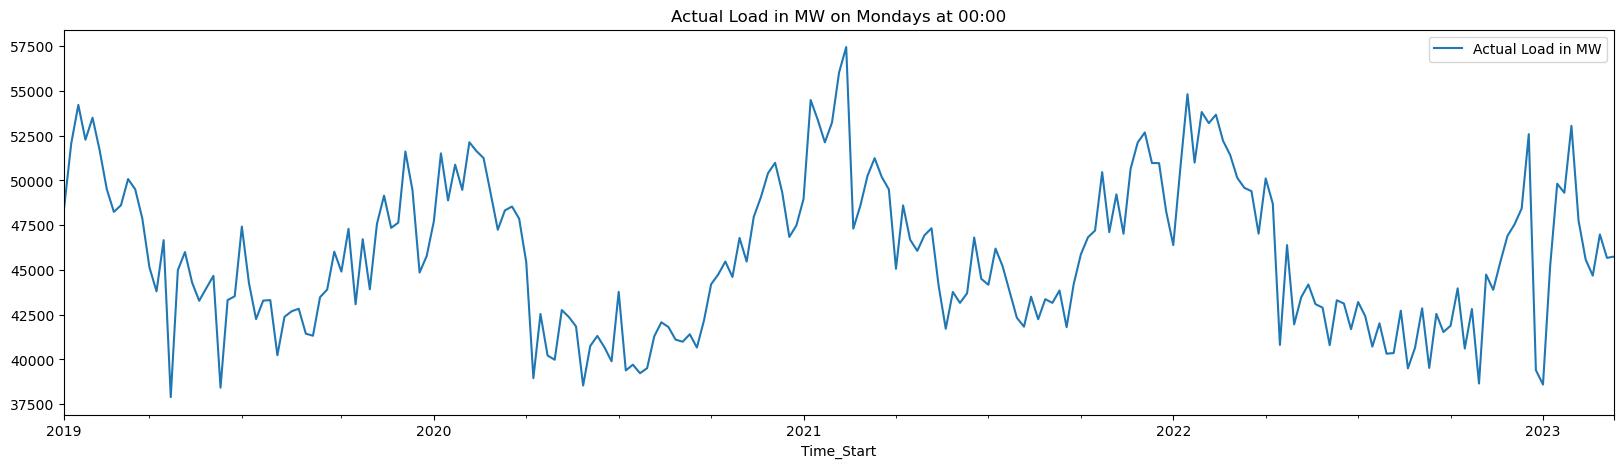

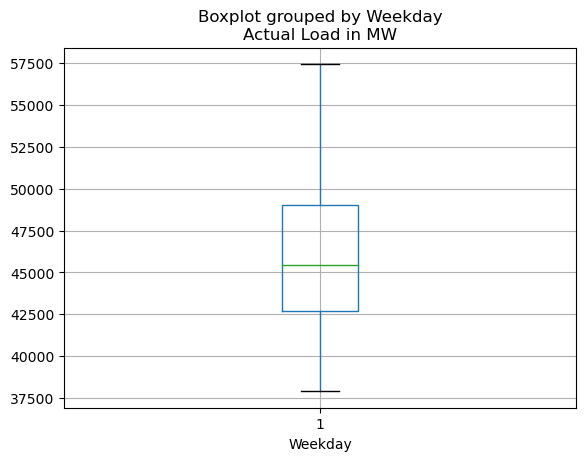

In [77]:
# Now a further look on the data could be usefull.
# What is on Mondays at midnight 
df_mo_0000 = df_mo.loc[df_mo['Time_Start'].dt.time == datetime.strptime('00:00:00', '%H:%M:%S').time()]
df_mo_0000.plot('Time_Start', 'Actual Load in MW', title='Actual Load in MW on Mondays at 00:00', figsize=(20, 5))
plt.show();

# Lets use boxplot for better visualization.
df_mo_0000.boxplot(by='Weekday', column=['Actual Load in MW']);

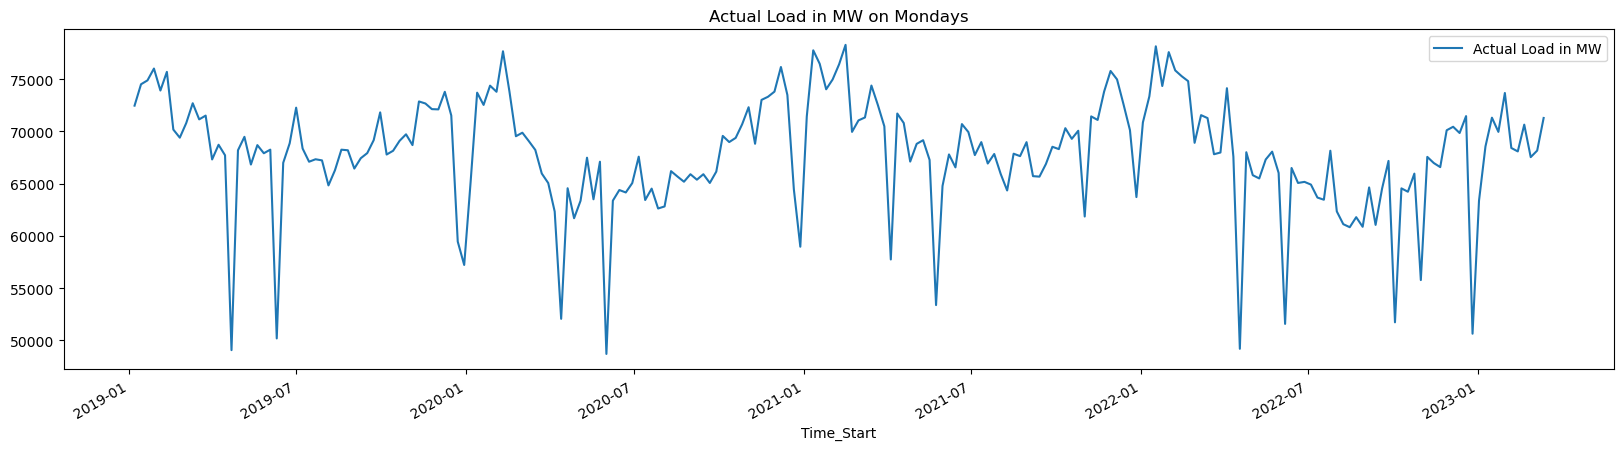

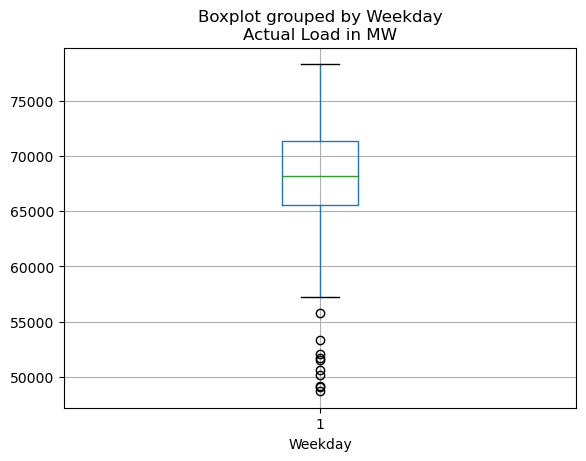

In [78]:
# I am interestet if load divergates midnight  time to lunch time
df_mo_1200 = df_mo.loc[df_mo['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time()]
df_mo_1200.plot('Time_Start', 'Actual Load in MW', title='Actual Load in MW on Mondays', figsize=(20, 5))
plt.show();

# Lets use boxplot for better visualization.
df_mo_1200.boxplot(by='Weekday', column=['Actual Load in MW']);

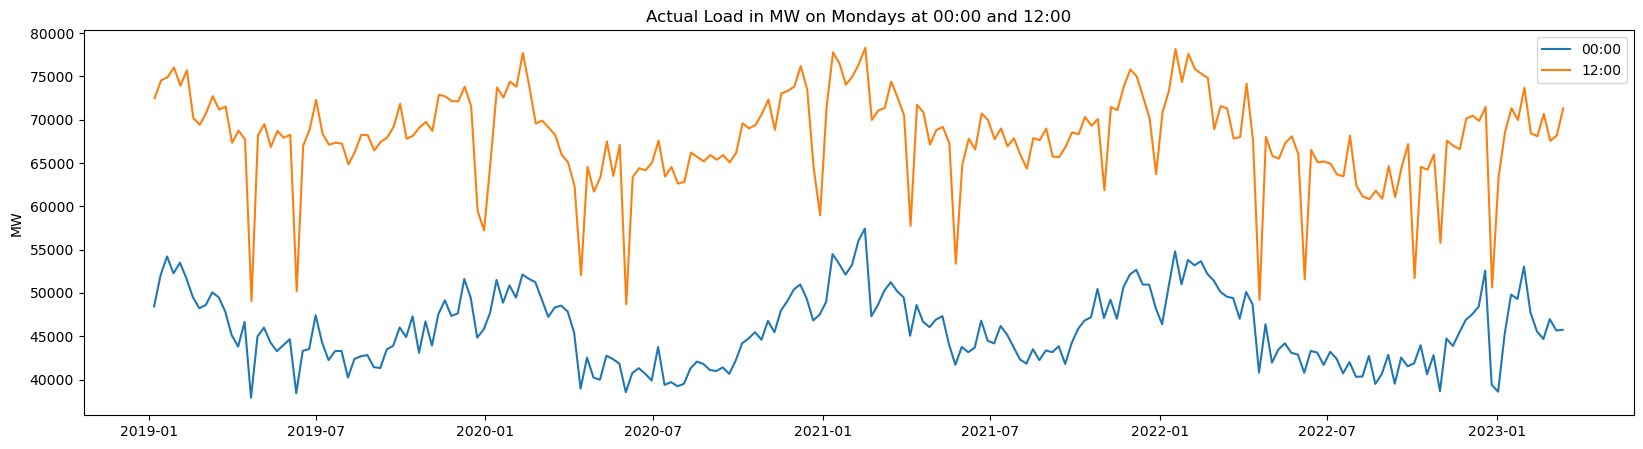

In [79]:
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
"""Compare the loads of 00:00 and 12:00 on Mondays in one chart"""
plt.figure(figsize=(20,5))
plt.title('Actual Load in MW on Mondays at 00:00 and 12:00')
plt.ylabel('MW')
plt.plot(df_mo_0000['Time_Start'], df_mo_0000['Actual Load in MW'])
plt.plot(df_mo_1200['Time_Start'], df_mo_1200['Actual Load in MW'])

plt.legend(['00:00', '12:00']);

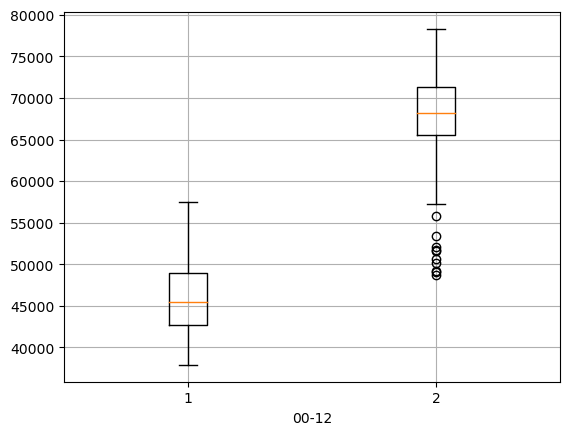

In [80]:
# A huge difference is seen but it seems like a pattern of a trend could be idenified 
# Lets bring the two boxplots together.
plt.boxplot([df_mo_0000['Actual Load in MW'], df_mo_1200['Actual Load in MW']])
plt.xlabel('00-12')
plt.grid();

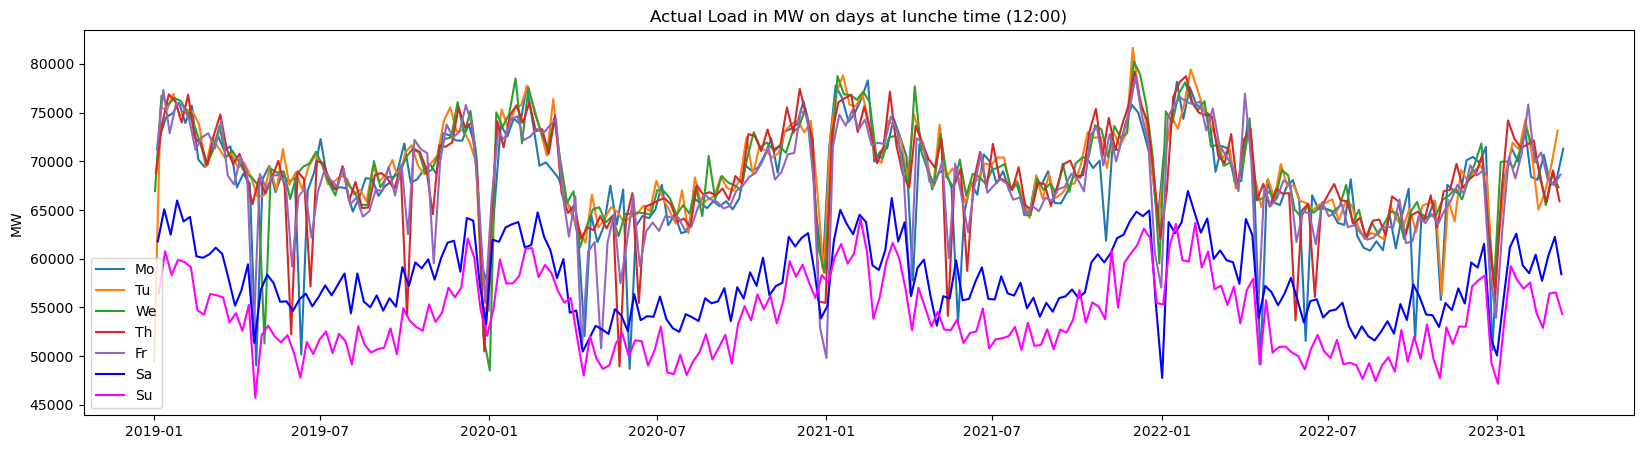

In [81]:
# To identify a pattern the lineplot is more approbriate. 
mo_12 =df[(df['Weekday']==1) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
tu_12 =df[(df['Weekday']==2) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
we_12 =df[(df['Weekday']==3) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
th_12 =df[(df['Weekday']==4) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
fr_12 =df[(df['Weekday']==5) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
sa_12 =df[(df['Weekday']==6) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
su_12 =df[(df['Weekday']==7) & (df['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]

#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot

plt.figure(figsize=(20,5))
plt.title('Actual Load in MW on days at lunche time (12:00)')
plt.ylabel('MW')
plt.plot(mo_12['Time_Start'], mo_12['Actual Load in MW'])
plt.plot(tu_12['Time_Start'], tu_12['Actual Load in MW'])
plt.plot(we_12['Time_Start'], we_12['Actual Load in MW'])
plt.plot(th_12['Time_Start'], th_12['Actual Load in MW'])
plt.plot(fr_12['Time_Start'], fr_12['Actual Load in MW'])
plt.plot(sa_12['Time_Start'], sa_12['Actual Load in MW'], color = 'blue')
plt.plot(su_12['Time_Start'], su_12['Actual Load in MW'], color='magenta')

plt.legend(['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']);

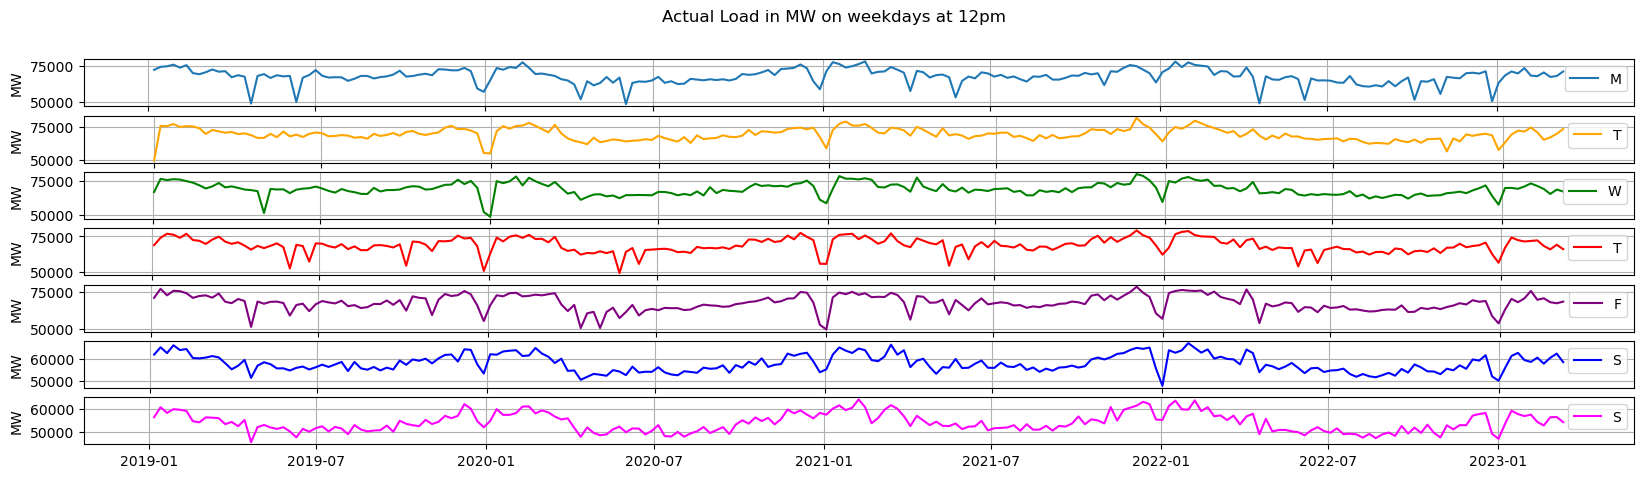

In [82]:
# I can be seen that for weekdays (Mo-Fr) the load pattern are similar 
# and for Saturdays and Sundays but the load is lower on Sundays.  
# Furthermore it can be seen that loads  peak at winter times and also the relevance of public hollidays.

# To get a cleaner look, it could be usefull to print data in different plots.
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(20, 5))
fig.suptitle('Actual Load in MW on weekdays at 12pm')


# loop would be nice
ax1.plot(mo_12['Time_Start'], mo_12['Actual Load in MW'])
ax1.legend('MO')
ax1.set_ylabel('MW')
ax1.grid()

ax2.plot(tu_12['Time_Start'], tu_12['Actual Load in MW'], color='orange')
ax2.legend('TU')
ax2.set_ylabel('MW')
ax2.grid()

ax3.plot(we_12['Time_Start'], we_12['Actual Load in MW'], color='green')
ax3.legend('WE')
ax3.set_ylabel('MW')
ax3.grid()

ax4.plot(th_12['Time_Start'], th_12['Actual Load in MW'], color='red')
ax4.legend('TH')
ax4.set_ylabel('MW')
ax4.grid()

ax5.plot(fr_12['Time_Start'], fr_12['Actual Load in MW'], color='purple')
ax5.legend('FR')
ax5.set_ylabel('MW')
ax5.grid()

ax6.plot(sa_12['Time_Start'], sa_12['Actual Load in MW'], color='blue')
ax6.legend('SA')
ax6.set_ylabel('MW')
ax6.grid()

ax7.plot(su_12['Time_Start'], su_12['Actual Load in MW'], color='magenta')
ax7.legend('SU')
ax7.set_ylabel('MW')
ax7.grid()

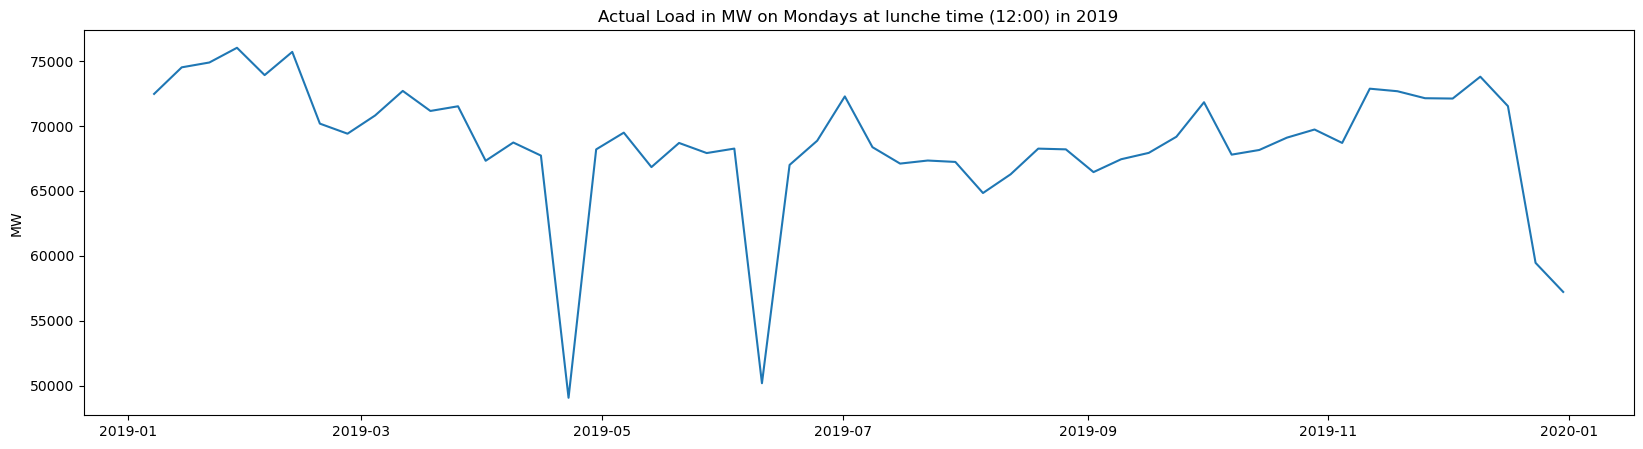

In [83]:
# It seems like holydays do affect the load and the load is bigger in winter than in summer. 
# By the lineplot a change over the years is hard to see. Therefore boxplot could be suitable. 
# Before we follow this hypothesis, lets have a closer look on a singel weekday at certain times. 

# Regarting the hypothesis it makes sence to zoom into one year at the same weekday and time. 
# Recreating df with weekday
df_2019 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2019]
df_2020 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2020]
df_2021 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2021]
df_2022 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2022]
df_2023 = df[pd.DatetimeIndex(df['Time_Start']).year ==  2023]

y19_mo_12 =df_2019[(df_2019['Weekday']==1) & (df_2019['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]

plt.figure(figsize=(20,5))
plt.title('Actual Load in MW on Mondays at lunche time (12:00) in 2019')
plt.ylabel('MW')
plt.plot(y19_mo_12['Time_Start'], y19_mo_12['Actual Load in MW']);

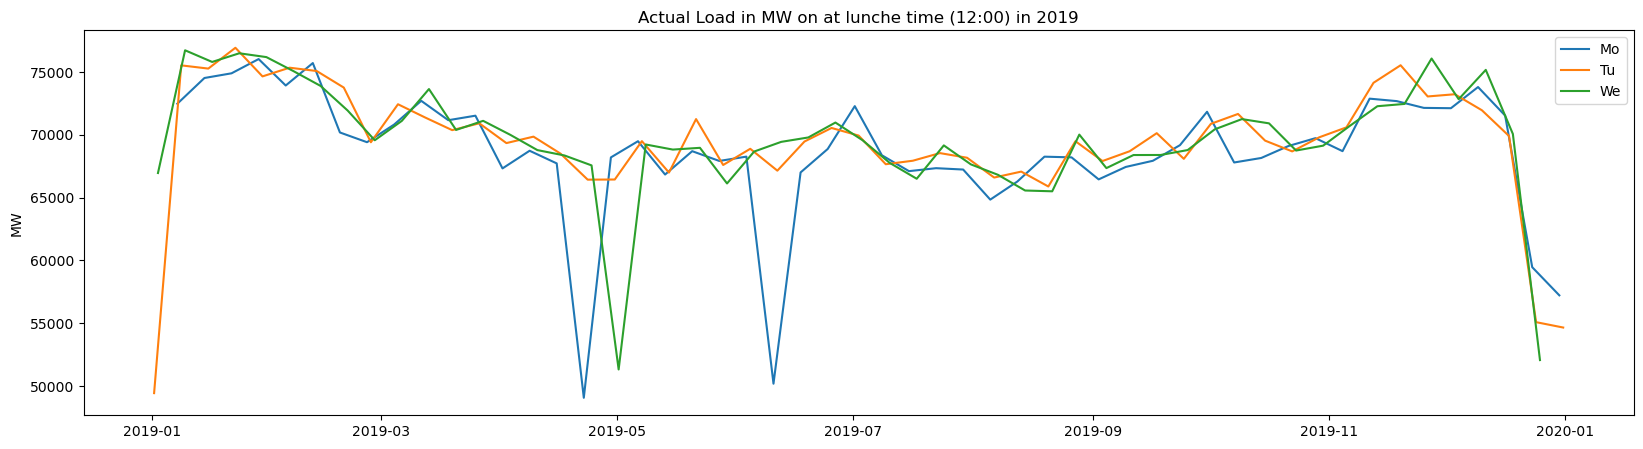

In [84]:
# There we can see four outlier. 
# At the end of the year the might be on xmas holidays in April there was Easter monday a public holitay 
# and seven weeks later there is Pfingsten a public holiday too. If so Wednesdays should not have so may outliers. 
y19_tu_12 =df_2019[(df_2019['Weekday']==2) & (df_2019['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
y19_we_12 =df_2019[(df_2019['Weekday']==3) & (df_2019['Time_Start'].dt.time == datetime.strptime('12:00:00', '%H:%M:%S').time())]
plt.figure(figsize=(20,5))
plt.title('Actual Load in MW on at lunche time (12:00) in 2019')
plt.ylabel('MW')
plt.plot(y19_mo_12['Time_Start'], y19_mo_12['Actual Load in MW'])
plt.plot(y19_tu_12['Time_Start'], y19_tu_12['Actual Load in MW'])
plt.plot(y19_we_12['Time_Start'], y19_we_12['Actual Load in MW'])

plt.legend(['Mo', 'Tu', 'We']);

In [62]:
# But what does the outlier on Wednesday one week after show. It's 1st of May an other public holiday.
# Propably it make sence to comulate the total load by weekday.
#df.set_index('Time_Start')
df_helper_1 = df
df.sample(2)

Time_Start  Weekday  Load Forecast Day-ahead  in MW  \
33517 2020-12-15 02:15:00        2                         48258.0   
22598 2020-08-23 09:30:00        7                         44677.0   

       Actual Load in MW  Day-ahead Price in EUR/MWh  \
33517            49232.0                       34.40   
22598            47310.0                       25.33   

       Biomass  - Actual Aggregated in MW  \
33517                              4617.0   
22598                              4503.0   

       Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
33517                                            12213.0      
22598                                             4241.0      

       Fossil Coal-derived gas  - Actual Aggregated in MW  \
33517                                                NaN    
22598                                                NaN    

       Fossil Gas  - Actual Aggregated in MW  \
33517                                 6973.0   
22598                                 1794.0   

       Fossil Hard coal  - Actual Aggregated in MW  ...  \
33517                                       4457.0  ...   
22598                                       1555.0  ...   

       Hydro Pumped Storage  - Actual Consumption in MW  \
33517                                           -2582.0   
22598                                           -1996.0   

       Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
33517                                             1286.0            
22598                                             1755.0            

       Hydro Water Reservoir  - Actual Aggregated in MW  \
33517                                              12.0   
22598                                              71.0   

       Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
33517                              7740.0                             462.0   
22598                              7626.0                             228.0   

       Other renewable  - Actual Aggregated in MW  \
33517                                       187.0   
22598                                       129.0   

       Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
33517                               0.0                             695.0   
22598                           12783.0                             577.0   

       Wind Offshore  - Actual Aggregated in MW  \
33517                                    4586.0   
22598                                    3804.0   

       Wind Onshore  - Actual Aggregated in MW  
33517                                  13579.0  
22598                                  18359.0  

[2 rows x 23 columns]

In [85]:
# To get a less detailed view it makes sence to resample the dataframe for other time formates 
df_h = df.resample(rule='h', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.mean,'Actual Load in MW': np.mean,'Day-ahead Price in EUR/MWh': np.mean,'Biomass  - Actual Aggregated in MW': np.mean,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.mean,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.mean,'Fossil Gas  - Actual Aggregated in MW': np.mean,'Fossil Hard coal  - Actual Aggregated in MW': np.mean,'Fossil Oil  - Actual Aggregated in MW': np.mean,'Geothermal  - Actual Aggregated in MW': np.mean,'Hydro Pumped Storage  - Actual Aggregated in MW': np.mean,'Hydro Pumped Storage  - Actual Consumption in MW': np.mean,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.mean,'Hydro Water Reservoir  - Actual Aggregated in MW': np.mean,'Nuclear  - Actual Aggregated in MW': np.mean,'Other  - Actual Aggregated in MW': np.mean,'Other renewable  - Actual Aggregated in MW': np.mean,'Solar  - Actual Aggregated in MW': np.mean,'Waste  - Actual Aggregated in MW': np.mean,'Wind Offshore  - Actual Aggregated in MW': np.mean,'Wind Onshore  - Actual Aggregated in MW': np.mean})
df_h.reset_index(inplace=True)

# Only show two digit
pd.options.display.float_format = '{:,.2f}'.format
df_h.head(3)

Time_Start  Weekday  Load Forecast Day-ahead  in MW  \
0 2019-01-01 00:00:00     2.00                       43,647.50   
1 2019-01-01 01:00:00     2.00                       41,692.50   
2 2019-01-01 02:00:00     2.00                       40,587.50   

   Actual Load in MW  Day-ahead Price in EUR/MWh  \
0          43,713.50                       20.00   
1          42,091.00                       13.54   
2          40,537.00                        5.59   

   Biomass  - Actual Aggregated in MW  \
0                            4,831.25   
1                            4,824.50   
2                            4,782.25   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                           6,335.00      
1                                           5,379.50      
2                                           5,341.00      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                             429.00    
1                                             455.50    
2                                             469.50    

   Fossil Gas  - Actual Aggregated in MW  \
0                               3,281.75   
1                               2,975.25   
2                               2,728.00   

   Fossil Hard coal  - Actual Aggregated in MW  ...  \
0                                     2,811.75  ...   
1                                     2,404.25  ...   
2                                     2,228.50  ...   

   Hydro Pumped Storage  - Actual Consumption in MW  \
0                                         -1,375.00   
1                                         -1,533.50   
2                                         -2,598.50   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                           1,484.50            
1                                           1,493.50            
2                                           1,428.50            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                             86.75   
1                                             74.50   
2                                             97.25   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                            9,001.50                            475.00   
1                            8,535.25                            435.75   
2                            7,954.00                            371.75   

   Other renewable  - Actual Aggregated in MW  \
0                                      107.00   
1                                      107.00   
2                                      107.00   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                              0.00                            778.25   
1                              0.00                            776.00   
2                              0.00                            780.25   

   Wind Offshore  - Actual Aggregated in MW  \
0                                  3,134.00   
1                                  2,868.25   
2                                  2,460.25   

   Wind Onshore  - Actual Aggregated in MW  
0                                20,401.50  
1                                22,384.00  
2                                23,238.25  

[3 rows x 23 columns]

In [86]:
# As basis the hour data frame has the advantage for later calculations with especially for cumulated load in Watt per hour.
# Lets say it the technical way. If in the aggregation a sum function is used the basis has to be the hour data frame!!
""" If peakes and dips should be identified its the orginal dataframe has to be used."""
df_6h = df_h.resample(rule='6h', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.mean,'Actual Load in MW': np.mean,'Day-ahead Price in EUR/MWh': np.mean,'Biomass  - Actual Aggregated in MW': np.mean,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.mean,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.mean,'Fossil Gas  - Actual Aggregated in MW': np.mean,'Fossil Hard coal  - Actual Aggregated in MW': np.mean,'Fossil Oil  - Actual Aggregated in MW': np.mean,'Geothermal  - Actual Aggregated in MW': np.mean,'Hydro Pumped Storage  - Actual Aggregated in MW': np.mean,'Hydro Pumped Storage  - Actual Consumption in MW': np.mean,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.mean,'Hydro Water Reservoir  - Actual Aggregated in MW': np.mean,'Nuclear  - Actual Aggregated in MW': np.mean,'Other  - Actual Aggregated in MW': np.mean,'Other renewable  - Actual Aggregated in MW': np.mean,'Solar  - Actual Aggregated in MW': np.mean,'Waste  - Actual Aggregated in MW': np.mean,'Wind Offshore  - Actual Aggregated in MW': np.mean,'Wind Onshore  - Actual Aggregated in MW': np.mean})
df_6h.reset_index(inplace=True)


# Only show two digit
pd.options.display.float_format = '{:,.2f}'.format
df_6h.head(4)


Time_Start  Weekday  Load Forecast Day-ahead  in MW  \
0 2019-01-01 00:00:00     2.00                       41,307.17   
1 2019-01-01 06:00:00     2.00                       47,376.29   
2 2019-01-01 12:00:00     2.00                       51,590.00   
3 2019-01-01 18:00:00     2.00                       50,829.83   

   Actual Load in MW  Day-ahead Price in EUR/MWh  \
0          40,768.46                        7.37   
1          42,376.08                      -14.85   
2          50,484.29                       -3.69   
3          51,176.33                       -4.03   

   Biomass  - Actual Aggregated in MW  \
0                            4,790.58   
1                            4,842.17   
2                            4,819.88   
3                            4,785.42   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                           5,430.25      
1                                           4,970.88      
2                                           4,966.88      
3                                           4,893.46      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                             478.38    
1                                             451.42    
2                                             474.62    
3                                             440.79    

   Fossil Gas  - Actual Aggregated in MW  \
0                               2,847.92   
1                               2,906.96   
2                               2,966.96   
3                               2,870.12   

   Fossil Hard coal  - Actual Aggregated in MW  ...  \
0                                     2,403.50  ...   
1                                     2,451.42  ...   
2                                     2,793.83  ...   
3                                     2,710.79  ...   

   Hydro Pumped Storage  - Actual Consumption in MW  \
0                                         -2,957.38   
1                                         -4,088.67   
2                                           -974.17   
3                                         -1,515.25   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                           1,433.92            
1                                           1,388.67            
2                                           1,442.08            
3                                           1,376.88            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                             73.33   
1                                            112.62   
2                                            133.33   
3                                             36.46   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                            7,815.54                            397.08   
1                            6,950.33                            365.04   
2                            7,225.75                            365.50   
3                            6,568.17                            363.92   

   Other renewable  - Actual Aggregated in MW  \
0                                      107.00   
1                                      107.00   
2                                      107.00   
3                                      107.00   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                              0.00                            777.08   
1                            683.00                            773.75   
2                          1,002.96                            775.08   
3                              0.00                            779.33   

   Wind Offshore  - Actual Aggregated in MW  \
0                                  2,685.71   
1                                  2,189.46   
2                                  2,278.21   
3                                  1,998.38   

   Wind Onshore  - Actual Aggreg

In [87]:
# The hour dataframe takes the mean of the load from the last hour
df_d = df_h.resample(rule='d', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.sum,'Actual Load in MW': np.sum,'Day-ahead Price in EUR/MWh': np.sum,'Biomass  - Actual Aggregated in MW': np.sum,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.sum,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.sum,'Fossil Gas  - Actual Aggregated in MW': np.sum,'Fossil Hard coal  - Actual Aggregated in MW': np.sum,'Fossil Oil  - Actual Aggregated in MW': np.sum,'Geothermal  - Actual Aggregated in MW': np.sum,'Hydro Pumped Storage  - Actual Aggregated in MW': np.sum,'Hydro Pumped Storage  - Actual Consumption in MW': np.sum,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.sum,'Hydro Water Reservoir  - Actual Aggregated in MW': np.sum,'Nuclear  - Actual Aggregated in MW': np.sum,'Other  - Actual Aggregated in MW': np.sum,'Other renewable  - Actual Aggregated in MW': np.sum,'Solar  - Actual Aggregated in MW': np.sum,'Waste  - Actual Aggregated in MW': np.sum,'Wind Offshore  - Actual Aggregated in MW': np.sum,'Wind Onshore  - Actual Aggregated in MW': np.sum})
df_d.reset_index(inplace=True)

# Only show two digit
pd.options.display.float_format = '{:,.2f}'.format
df_d.head()

Time_Start  Weekday  Load Forecast Day-ahead  in MW  Actual Load in MW  \
0 2019-01-01     2.00                    1,146,619.75       1,108,831.00   
1 2019-01-02     3.00                    1,337,230.25       1,402,697.50   
2 2019-01-03     4.00                    1,386,460.25       1,477,978.00   
3 2019-01-04     5.00                    1,329,706.50       1,500,739.75   
4 2019-01-05     6.00                    1,270,270.25       1,329,978.50   

   Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
0                      -91.22                          115,428.25   
1                      900.15                          115,784.75   
2                    1,397.13                          116,651.00   
3                    1,194.67                          117,265.25   
4                      990.04                          116,470.00   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                         121,568.75      
1                                         219,818.25      
2                                         337,891.25      
3                                         357,775.25      
4                                         312,910.00      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                          11,071.25    
1                                          10,047.00    
2                                          10,156.00    
3                                          10,738.75    
4                                          11,454.75    

   Fossil Gas  - Actual Aggregated in MW  \
0                              69,551.75   
1                             109,529.00   
2                             198,914.00   
3                             168,912.25   
4                             132,396.00   

   Fossil Hard coal  - Actual Aggregated in MW  ...  \
0                                    62,157.25  ...   
1                                   132,438.25  ...   
2                                   289,076.00  ...   
3                                   199,299.25  ...   
4                                   130,985.50  ...   

   Hydro Pumped Storage  - Actual Consumption in MW  \
0                                        -57,212.75   
1                                        -37,560.50   
2                                        -25,986.75   
3                                        -26,456.25   
4                                        -50,514.25   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                          33,849.25            
1                                          32,428.25            
2                                          32,409.00            
3                                          32,458.75            
4                                          32,021.25            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                          2,134.50   
1                                          1,835.00   
2                                          1,644.50   
3                                          2,221.75   
4                                          2,125.50   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                          171,358.75                          8,949.25   
1                          196,988.25                         10,622.75   
2                          227,575.25                         11,363.50   
3                          221,901.00                         12,550.00   
4                          219,131.75                         12,496.50   

   Other renewable  - Actual Aggregated in MW  \
0                                    2,568.00   
1                                    2,568.00   
2                                    2,568.00   
3                                    2,568.00   
4                                    2,568.00   

   Solar  - Actual Aggregated in MW  

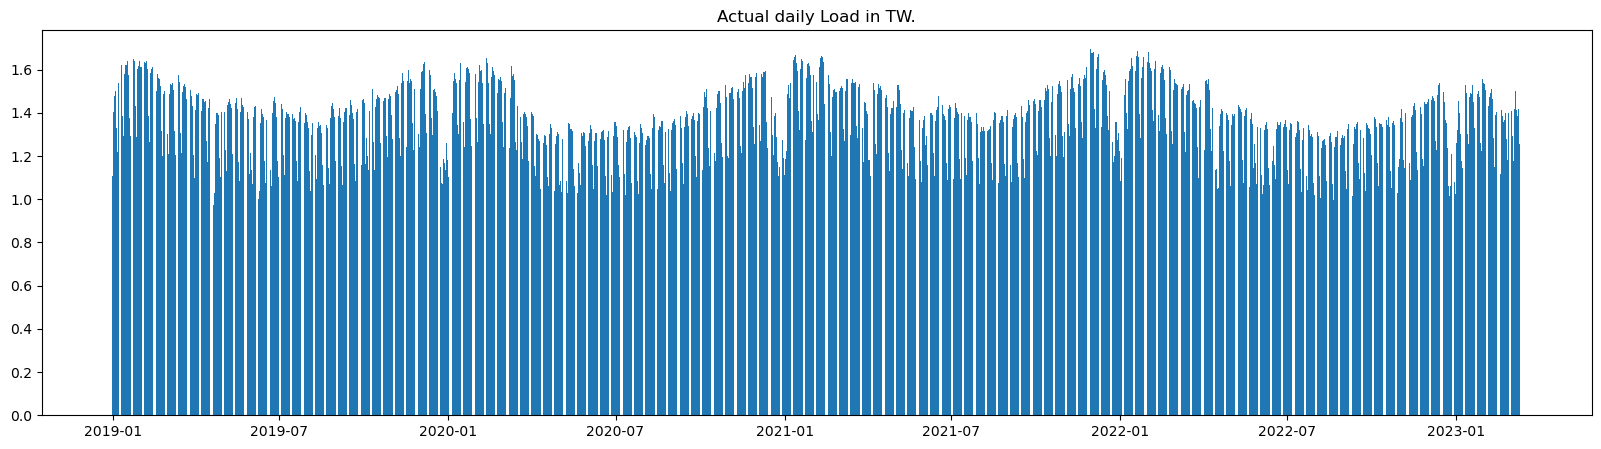

In [88]:
# The following diagram doesn't show usefull data because there are big differnces betwen max and min load 
# Anyway the pattern over the year and christmas holidays can be idendified. 
plt.figure(figsize=(20,5))
plt.title('Actual daily Load in TW.')
plt.bar(df_d['Time_Start'], df_d['Actual Load in MW']*1e-6);

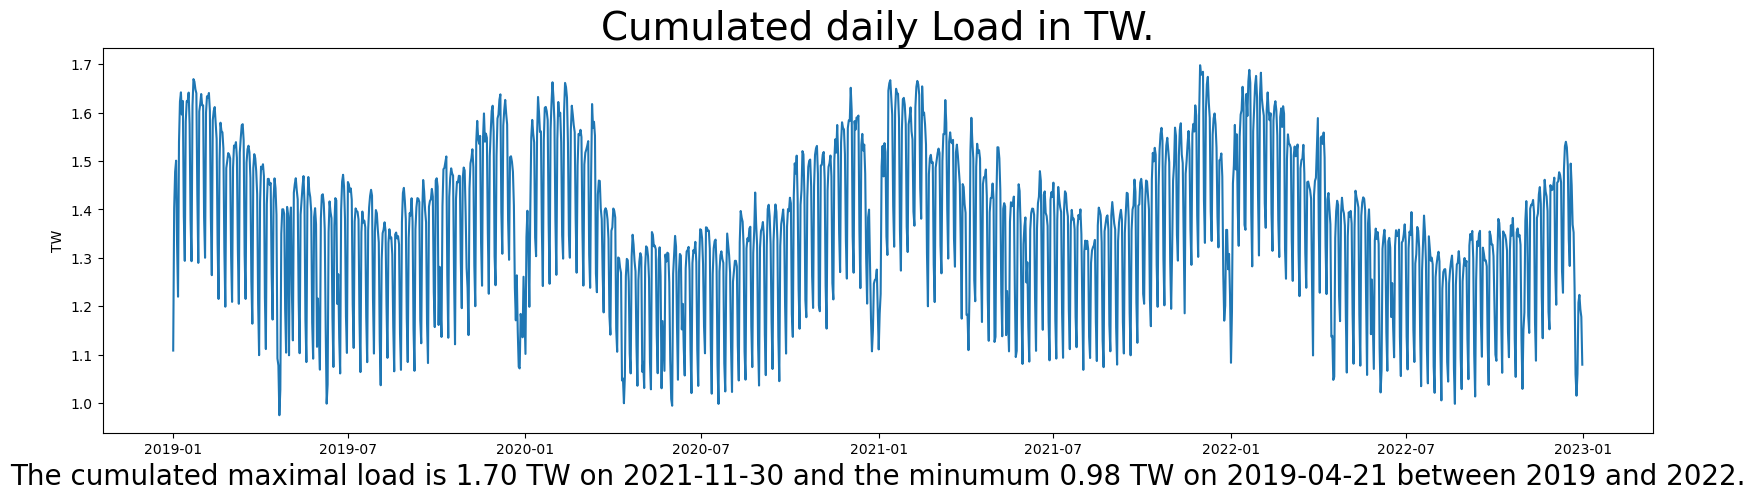

In [154]:
# The following diagram doesn't show usefull data because there are big differnces betwen max and min load 
# Anyway the pattern over the year and christmas holidays can be idendified. 
df_d_wo23 = df_d[pd.DatetimeIndex(df_d['Time_Start']).year < 2023]

load_d_cmax = df_d_wo23['Actual Load in MW'].max()
dt_max = df_d_wo23.loc[df_d_wo23['Actual Load in MW'] == load_d_cmax, 'Time_Start']

load_d_cmin = df_d_wo23['Actual Load in MW'].min()
dt_min = df_d_wo23.loc[df_d_wo23['Actual Load in MW'] == load_d_cmin, 'Time_Start']

plt.figure(figsize=(20,5))
plt.title('Cumulated daily Load in TW.', fontsize=28)
plt.ylabel('TW')
#plt.grid()
plt.xlabel('The cumulated maximal load is {:.2f} TW on {} and the minumum {:.2f} TW on {} between 2019 and 2022.'.format(load_d_cmax*1e-6, dt_max.to_string(index=False), load_d_cmin*1e-6, dt_min.to_string(index=False)), fontsize=20)
plt.plot(df_d_wo23['Time_Start'], df_d_wo23['Actual Load in MW']*1e-6);

In [147]:
# The following diagram doesn't show usefull data because there are big differnces betwen max and min load 
# Anyway the pattern over the year and christmas holidays can be idendified. 
def year_day_load_plot(year):
    df_d_year = df_d[pd.DatetimeIndex(df_d['Time_Start']).year == year]
    plt.figure(figsize=(20,5))
    plt.title('{}s Daily Load in TW.'.format(year), fontsize=28)
    plt.scatter(df_d_year['Time_Start'], df_d_year['Actual Load in MW']*1e-6)
    plt.plot(df_d_year['Time_Start'], df_d_year['Actual Load in MW']*1e-6)
    plt.ylabel('TW');

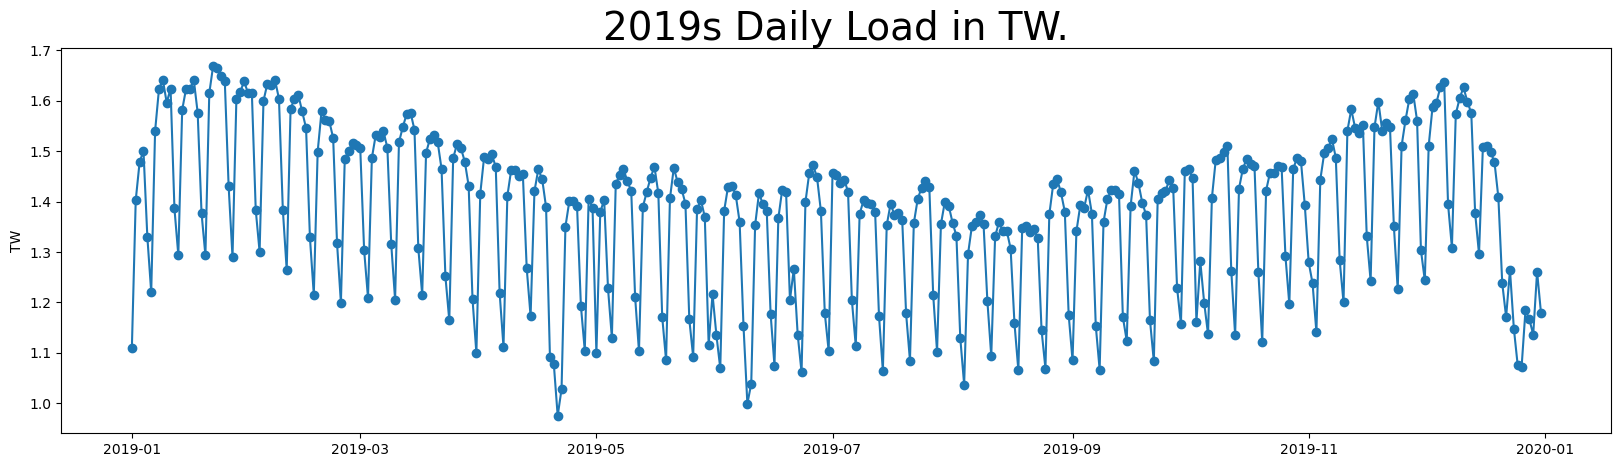

In [148]:
year_day_load_plot(2019)

In [149]:
# The following diagram doesn't show usefull data because there are big differnces betwen max and min load 
# Anyway the pattern over the year and christmas holidays can be idendified. 
def month_day_load_plot(year, month):
    df_d_year = df_d[pd.DatetimeIndex(df_d['Time_Start']).year == year]
    df_d_year_month = df_d_year[pd.DatetimeIndex(df_d_year['Time_Start']).month == month]
    plt.figure(figsize=(20,5))
    plt.title('Daily Load in TW in {}-{}.'.format(year, month), fontsize=28)
    plt.scatter(df_d_year_month['Time_Start'], df_d_year_month['Actual Load in MW']*1e-6)
    plt.plot(df_d_year_month['Time_Start'], df_d_year_month['Actual Load in MW']*1e-6);
    plt.ylabel('TW')

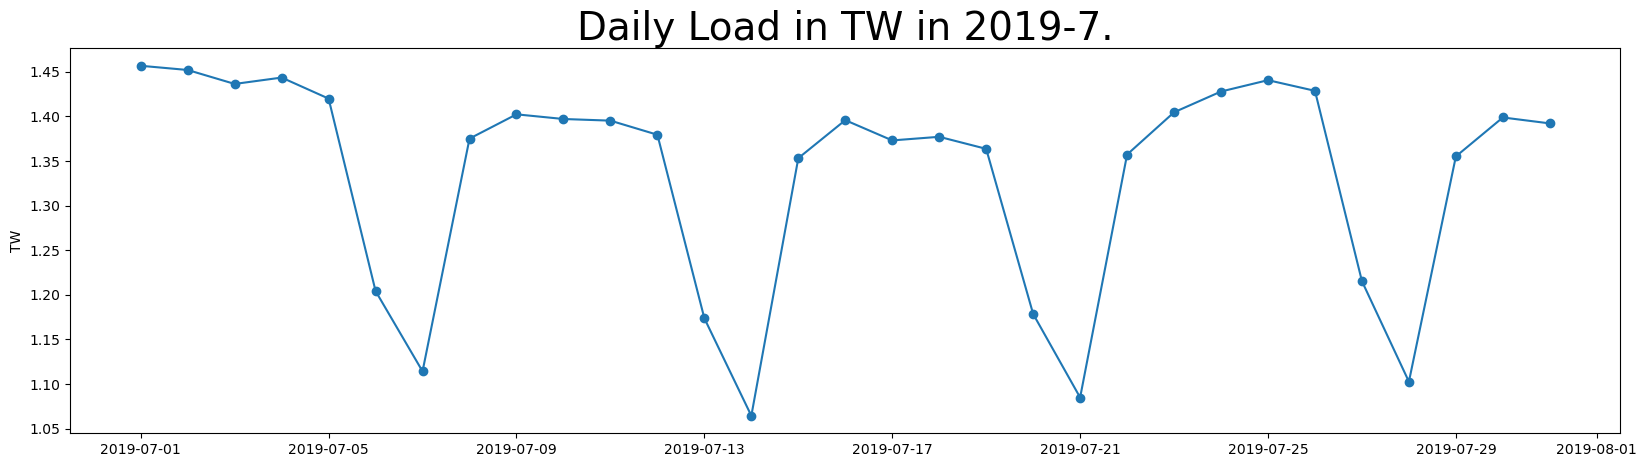

In [150]:
month_day_load_plot(2019, 7)

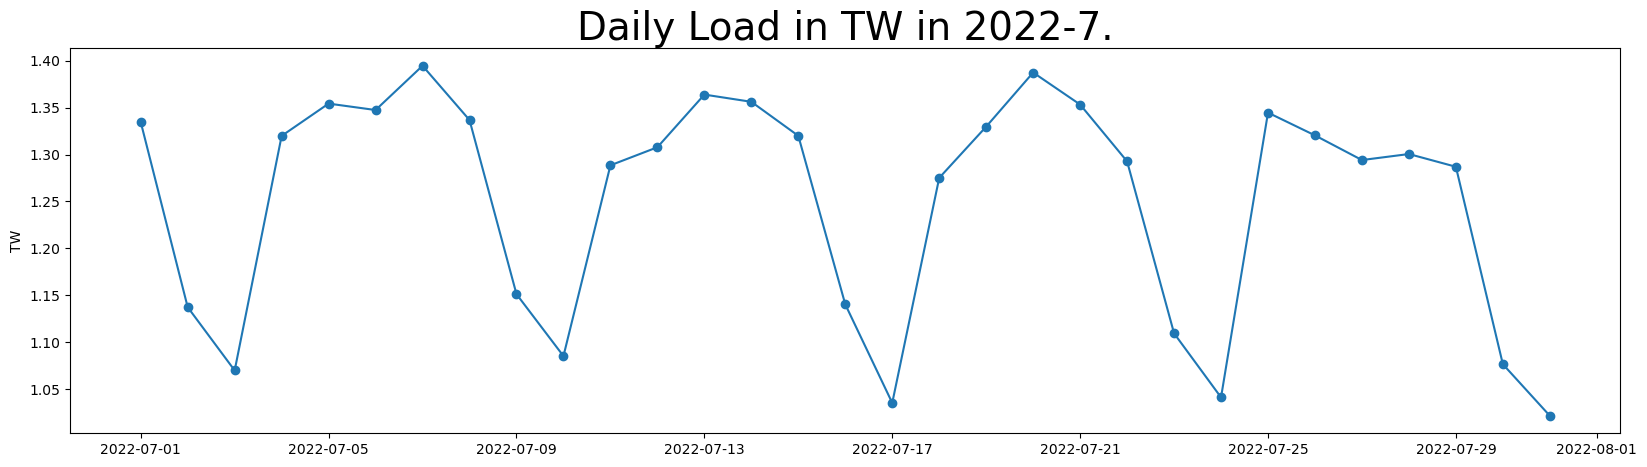

In [151]:
month_day_load_plot(2022, 7)

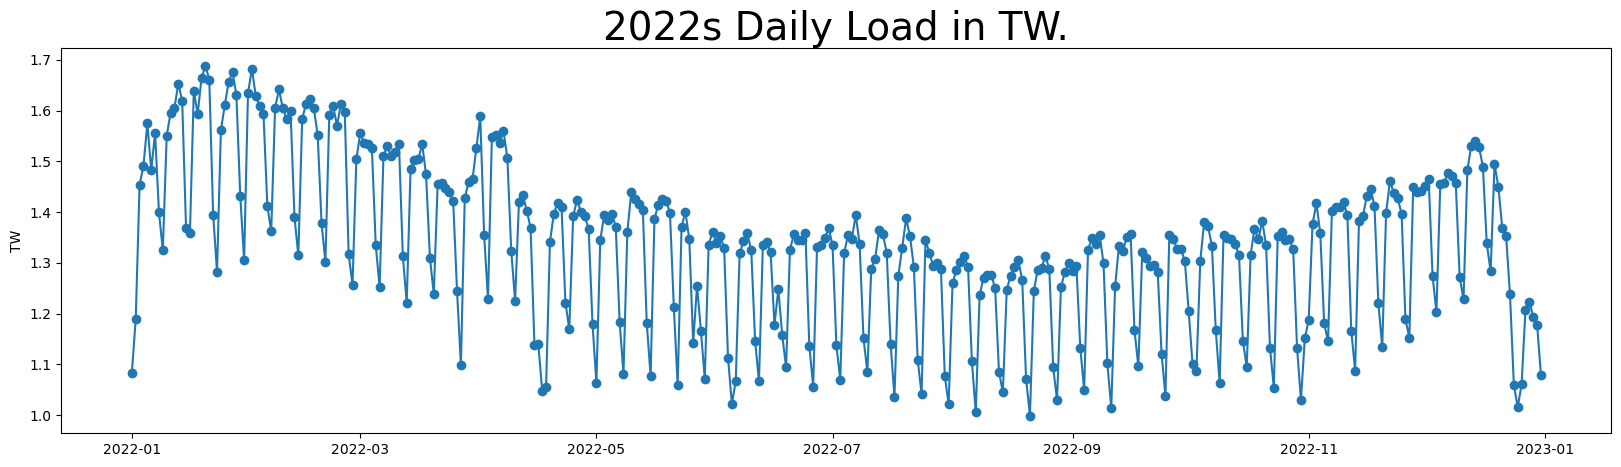

In [152]:
year_day_load_plot(2022)

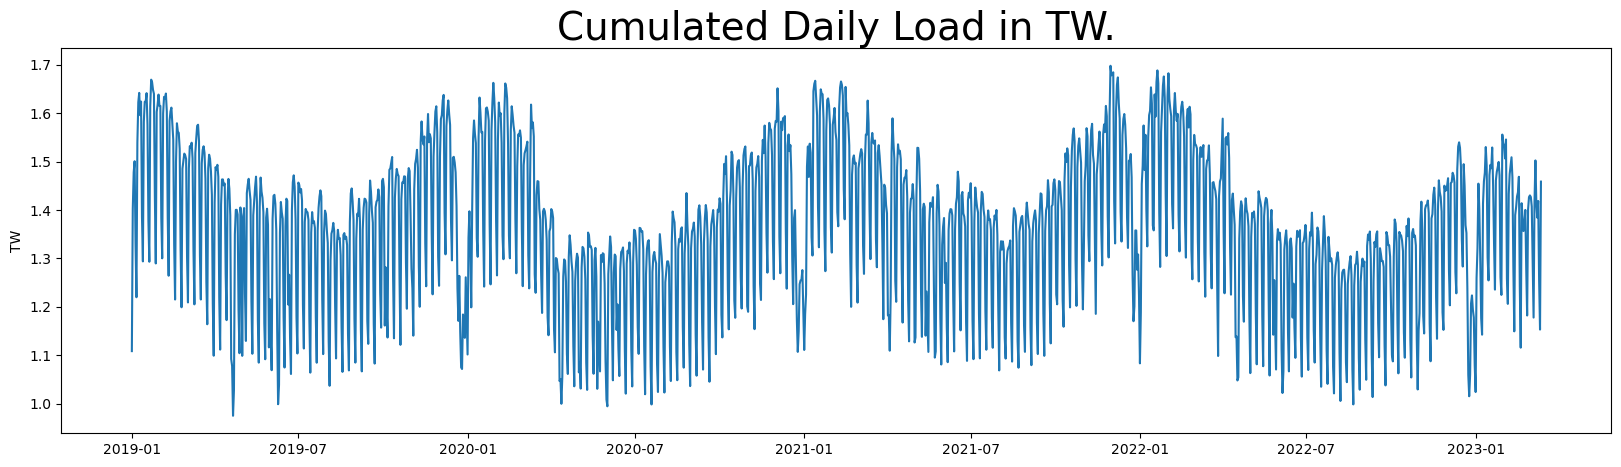

In [144]:
# The use of a line plot is easyier to read.
plt.figure(figsize=(20,5))
plt.title('Cumulated Daily Load in TW.', fontsize=28)
plt.ylabel('TW')
plt.plot(df_d['Time_Start'], df_d['Actual Load in MW']*1e-6);

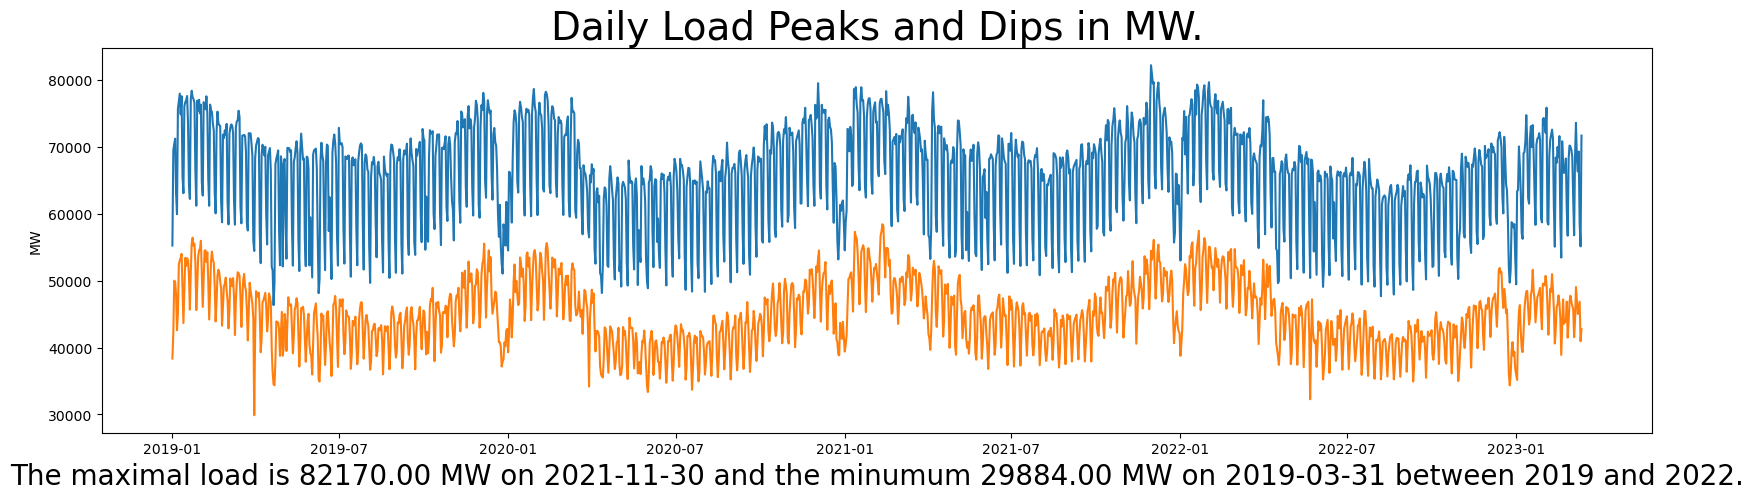

In [127]:
df_d_peak = df.resample(rule='d', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.max,'Actual Load in MW': np.max,'Day-ahead Price in EUR/MWh': np.max,'Biomass  - Actual Aggregated in MW': np.max,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.max,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.max,'Fossil Gas  - Actual Aggregated in MW': np.mean,'Fossil Hard coal  - Actual Aggregated in MW': np.max,'Fossil Oil  - Actual Aggregated in MW': np.max,'Geothermal  - Actual Aggregated in MW': np.max,'Hydro Pumped Storage  - Actual Aggregated in MW': np.max,'Hydro Pumped Storage  - Actual Consumption in MW': np.max,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.max,'Hydro Water Reservoir  - Actual Aggregated in MW': np.max,'Nuclear  - Actual Aggregated in MW': np.max,'Other  - Actual Aggregated in MW': np.max,'Other renewable  - Actual Aggregated in MW': np.max,'Solar  - Actual Aggregated in MW': np.max,'Waste  - Actual Aggregated in MW': np.max,'Wind Offshore  - Actual Aggregated in MW': np.max,'Wind Onshore  - Actual Aggregated in MW': np.max})
df_d_peak.reset_index(inplace=True)
load_d_cmax = df_d_peak['Actual Load in MW'].max()
dt_max = df_d_peak.loc[df_d_peak['Actual Load in MW'] == load_d_cmax, 'Time_Start']
df_d_peak.head()

df_d_dips = df.resample(rule='d', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.min,'Actual Load in MW': np.min,'Day-ahead Price in EUR/MWh': np.min,'Biomass  - Actual Aggregated in MW': np.min,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.min,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.min,'Fossil Gas  - Actual Aggregated in MW': np.min,'Fossil Hard coal  - Actual Aggregated in MW': np.min,'Fossil Oil  - Actual Aggregated in MW': np.min,'Geothermal  - Actual Aggregated in MW': np.min,'Hydro Pumped Storage  - Actual Aggregated in MW': np.min,'Hydro Pumped Storage  - Actual Consumption in MW': np.min,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.min,'Hydro Water Reservoir  - Actual Aggregated in MW': np.min,'Nuclear  - Actual Aggregated in MW': np.min,'Other  - Actual Aggregated in MW': np.min,'Other renewable  - Actual Aggregated in MW': np.min,'Solar  - Actual Aggregated in MW': np.min,'Waste  - Actual Aggregated in MW': np.max,'Wind Offshore  - Actual Aggregated in MW': np.min,'Wind Onshore  - Actual Aggregated in MW': np.min})
df_d_dips.reset_index(inplace=True)
load_d_cmin = df_d_dips['Actual Load in MW'].min()
dt_min = df_d_dips.loc[df_d_dips['Actual Load in MW'] == load_d_cmin, 'Time_Start']
df_d_dips.head()


#The plot for the peaks 
plt.figure(figsize=(20,5))
plt.title('Daily Load Peaks and Dips in MW.', fontsize=28)
plt.ylabel('MW')
plt.xlabel('The maximal load is {:.2f} MW on {} and the minumum {:.2f} MW on {} between 2019 and 2022.'.format(load_d_cmax, dt_max.to_string(index=False), load_d_cmin, dt_min.to_string(index=False)), fontsize=20)
plt.plot(df_d_peak['Time_Start'], df_d_peak['Actual Load in MW'])
plt.plot(df_d_dips['Time_Start'], df_d_dips['Actual Load in MW']);

Time_Start  Weekday  Load Forecast Day-ahead  in MW  Actual Load in MW  \
24    2021-01     4.19                   42,832,703.75      46,082,330.50   
35    2021-12     4.00                   44,386,285.00      45,366,840.00   
11    2019-12     3.94                   42,037,153.50      42,855,686.50   
0     2019-01     3.90                   44,614,904.25      46,888,204.75   

    Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
24                       53.84                        3,502,529.75   
35                      229.33                        3,491,204.75   
11                       31.91                        3,693,150.75   
0                        50.44                        3,626,556.75   

    Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
24                                      10,260,437.50      
35                                       9,605,742.00      
11                                       7,663,102.25      
0                                        9,862,384.25      

    Fossil Coal-derived gas  - Actual Aggregated in MW  \
24                                               0.00    
35                                               0.00    
11                                               0.00    
0                                          322,383.00    

    Fossil Gas  - Actual Aggregated in MW  \
24                           6,200,405.75   
35                           5,161,978.50   
11                           4,552,192.00   
0                            5,771,664.75   

    Fossil Hard coal  - Actual Aggregated in MW  ...  \
24                                 5,111,958.25  ...   
35                                 6,117,467.50  ...   
11                                 3,657,092.75  ...   
0                                  7,549,348.25  ...   

    Hydro Pumped Storage  - Actual Consumption in MW  \
24                                         -1,456.56   
35                                         -1,462.21   
11                                         -1,558.74   
0                                          -1,525.30   

    Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
24                                         935,553.00            
35                                         858,334.25            
11                                       1,043,729.00            
0                                        1,078,916.75            

    Hydro Water Reservoir  - Actual Aggregated in MW  \
24                                         67,132.75   
35                                         60,096.50   
11                                         73,486.75   
0                                          87,494.50   

    Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
24                        5,925,379.00                        335,834.00   
35                        5,597,806.50                        298,330.00   
11                        6,523,889.50                        333,590.25   
0                         6,821,064.00                        361,026.50   

    Other renewable  - Actual Aggregated in MW  \
24                                  149,390.25   
35                                  127,056.25   
11                                  137,534.75   
0                                   115,671.75   

    Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
24                        615,011.75                        554,016.75   
35                        721,933.25                        627,928.25   
11                        935,861.00                        618,214.00   
0                         747,027.50                        489,501.50   

    Wind Offshore  - Actual Aggregated in MW  \
24                              2,263,541.25   
35                              2,555,839.25   
11                              3,028,489.00   
0                               2,213,086.50   

    Wind Onshore  - Actual Agg

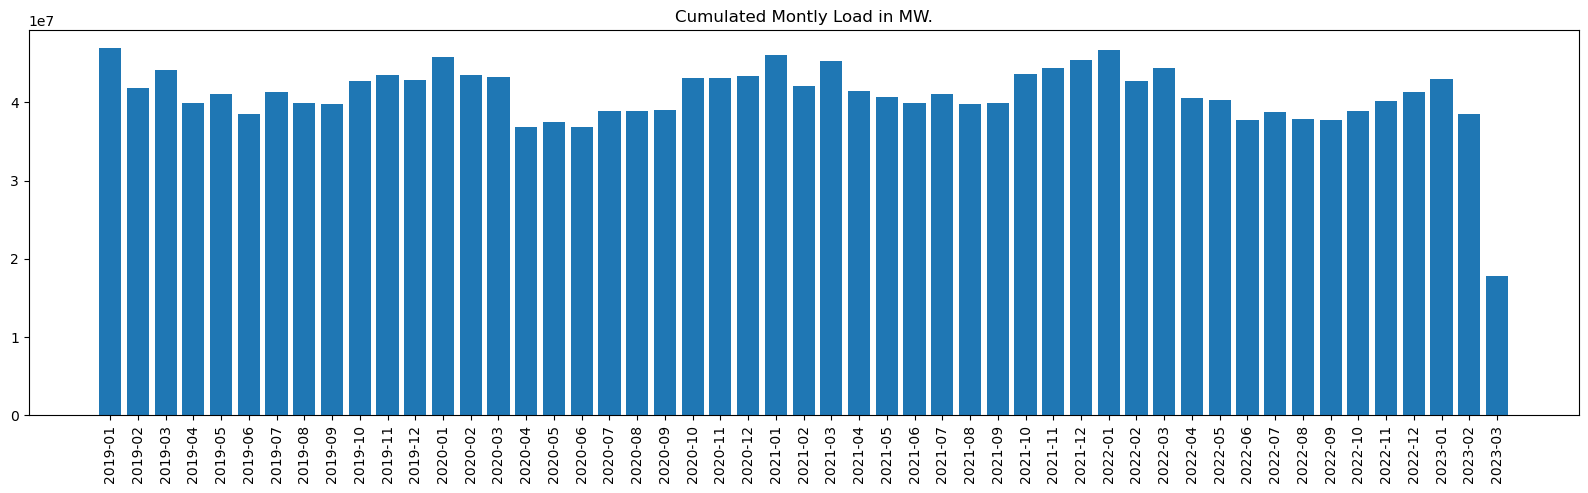

In [99]:
# The Dataframe for every month bases on the dataframe for hours 
df_m = df_h.resample(rule='M', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.sum,'Actual Load in MW': np.sum,'Day-ahead Price in EUR/MWh': np.mean,'Biomass  - Actual Aggregated in MW': np.sum,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.sum,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.sum,'Fossil Gas  - Actual Aggregated in MW': np.sum,'Fossil Hard coal  - Actual Aggregated in MW': np.sum,'Fossil Oil  - Actual Aggregated in MW': np.sum,'Geothermal  - Actual Aggregated in MW': np.sum,'Hydro Pumped Storage  - Actual Aggregated in MW': np.sum,'Hydro Pumped Storage  - Actual Consumption in MW': np.mean,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.sum,'Hydro Water Reservoir  - Actual Aggregated in MW': np.sum,'Nuclear  - Actual Aggregated in MW': np.sum,'Other  - Actual Aggregated in MW': np.sum,'Other renewable  - Actual Aggregated in MW': np.sum,'Solar  - Actual Aggregated in MW': np.sum,'Waste  - Actual Aggregated in MW': np.sum,'Wind Offshore  - Actual Aggregated in MW': np.sum,'Wind Onshore  - Actual Aggregated in MW': np.sum})
df_m.reset_index(inplace=True)

df_m['Time_Start'] = df_m['Time_Start'].apply(lambda x:x.strftime('%Y-%m'))#.dt.to_period('M')
#df_m.dtypes
plt.figure(figsize=(20,5))
plt.title('Cumulated Montly Load in MW.')
plt.xticks(rotation=90)
plt.bar(df_m['Time_Start'], df_m['Actual Load in MW'])
df_m.sample(4)

Time_Start  Weekday  Load Forecast Day-ahead  in MW  Actual Load in MW  \
0 2019-12-31     3.99                  483,314,258.00     502,400,048.38   
1 2020-12-31     4.00                  479,934,030.25     490,189,578.62   
2 2021-12-31     4.00                  493,135,643.88     509,614,846.75   
3 2022-12-31     4.01                  491,746,987.25     487,243,010.88   

   Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
0                       37.94                       40,554,780.25   
1                       30.40                       41,089,887.62   
2                       98.35                       39,744,756.50   
3                      237.54                       39,753,547.50   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                     102,723,707.88      
1                                      83,369,709.25      
2                                      98,193,126.38      
3                                     103,514,403.62      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                       1,954,566.50    
1                                               0.00    
2                                               0.00    
3                                               0.00    

   Fossil Gas  - Actual Aggregated in MW  \
0                          54,860,176.75   
1                          59,343,363.50   
2                          52,624,522.00   
3                          53,622,748.75   

   Fossil Hard coal  - Actual Aggregated in MW  ...  \
0                                47,814,025.00  ...   
1                                34,870,467.75  ...   
2                                51,839,700.75  ...   
3                                62,893,250.25  ...   

   Hydro Pumped Storage  - Actual Consumption in MW  \
0                                    -12,001,014.88   
1                                    -13,742,307.00   
2                                    -11,311,743.25   
3                                    -14,346,987.12   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                      14,594,302.25            
1                                      14,431,505.50            
2                                      13,353,513.25            
3                                      11,304,273.62            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                      1,327,978.25   
1                                      1,229,485.38   
2                                      1,195,621.75   
3                                      1,133,806.00   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                       71,035,469.38                      3,328,137.50   
1                       60,917,276.12                      3,098,619.50   
2                       65,398,732.25                      2,891,956.25   
3                       32,821,374.88                      2,303,026.75   

   Other renewable  - Actual Aggregated in MW  \
0                                1,282,937.25   
1                                1,409,783.75   
2                                1,335,976.75   
3                                1,028,922.88   

   Solar  - Actual Aggregated in MW  Waste  - Actual Aggregated in MW  \
0                     42,040,214.75                      6,038,746.12   
1                     45,974,475.25                      6,036,705.25   
2                     46,797,405.75                      6,973,192.75   
3                     55,701,177.75                      6,513,766.88   

   Wind Offshore  - Actual Aggregated in MW  \
0                             24,379,125.12   
1                             26,877,201.62   
2                             24,007,723.12   
3                             24,747,897.12   

   Wind Onshore  - Actual Aggregated in MW  
0                           100,154,126.25  
1   

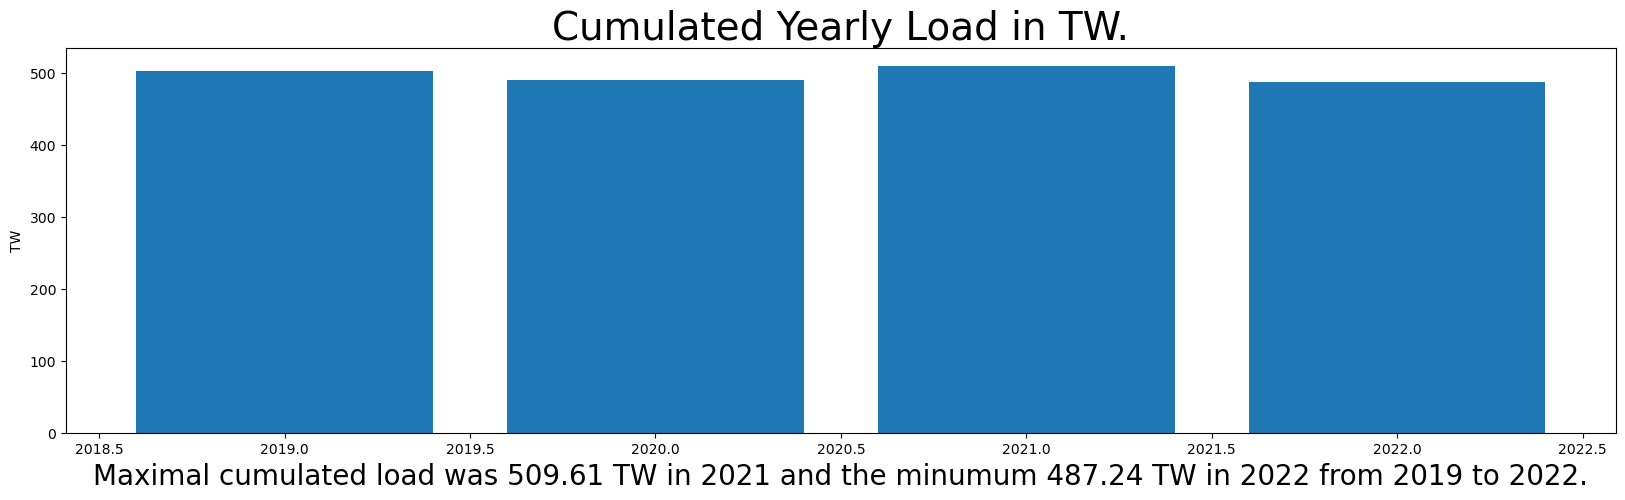

In [143]:
df_y = df_h.resample(rule='Y', on='Time_Start').agg({'Weekday': np.mean, 'Load Forecast Day-ahead  in MW': np.sum,'Actual Load in MW': np.sum,'Day-ahead Price in EUR/MWh': np.mean,'Biomass  - Actual Aggregated in MW': np.sum,'Fossil Brown coal/Lignite  - Actual Aggregated in MW': np.sum,'Fossil Coal-derived gas  - Actual Aggregated in MW': np.sum,'Fossil Gas  - Actual Aggregated in MW': np.sum,'Fossil Hard coal  - Actual Aggregated in MW': np.sum,'Fossil Oil  - Actual Aggregated in MW': np.sum,'Geothermal  - Actual Aggregated in MW': np.sum,'Hydro Pumped Storage  - Actual Aggregated in MW': np.sum,'Hydro Pumped Storage  - Actual Consumption in MW': np.sum,'Hydro Run-of-river and poundage  - Actual Aggregated in MW': np.sum,'Hydro Water Reservoir  - Actual Aggregated in MW': np.sum,'Nuclear  - Actual Aggregated in MW': np.sum,'Other  - Actual Aggregated in MW': np.sum,'Other renewable  - Actual Aggregated in MW': np.sum,'Solar  - Actual Aggregated in MW': np.sum,'Waste  - Actual Aggregated in MW': np.sum,'Wind Offshore  - Actual Aggregated in MW': np.sum,'Wind Onshore  - Actual Aggregated in MW': np.sum})

df_y = df_y.drop(df_y.index[4], axis=0)
df_y.reset_index(inplace=True)

load_max = df_y['Actual Load in MW'].max()
load_min = df_y['Actual Load in MW'].min()
dt_max = df_y.loc[df_y['Actual Load in MW'] == load_max, 'Time_Start'].dt.year
dt_min = df_y.loc[df_y['Actual Load in MW'] == load_min, 'Time_Start'].dt.year
 #df_y['Time_Start'], 
    
plt.figure(figsize=(20,5))
plt.title('Cumulated Yearly Load in TW.', fontsize=28)
plt.bar(df_y['Time_Start'].dt.year, df_y['Actual Load in MW']*1e-6)
plt.ylabel('TW')
plt.xlabel('Maximal cumulated load was {:.2f} TW in {} and the minumum {:.2f} TW in {} from 2019 to 2022.'.format(load_max*1e-6, dt_max.to_string(index=False), load_min*1e-6, dt_min.to_string(index=False)), fontsize=20)
#plt.grid()
df_y.head()

In [102]:
# There is one cunsumption column in dataframe this one has to be removed for the total production.
avg_load = df_y['Actual Load in MW'].mean()*1e-6

load_2022 = df_y.loc[3, 'Actual Load in MW']*1e-6
load_2021 = df_y.loc[2, 'Actual Load in MW']*1e-6
load_2020 = df_y.loc[1, 'Actual Load in MW']*1e-6
load_2019 = df_y.loc[2, 'Actual Load in MW']*1e-6

diff = load_2022 - avg_load
diff_per = diff*100/avg_load
print('{:.2f} TW was the average load over the years from 2019 on.\nThe load in 2022 was {:.2f} TW.\nThat is {:.2f}TW/{:.2f}% over the average.'.format(avg_load, load_2022, np.abs(diff), np.abs(diff_per)))

497.36 TW was the average load over the years from 2019 on.
The load in 2022 was 487.24 TW.
That is 10.12TW/2.03% over the average.


In [103]:
diff = load_2021 - avg_load
diff_per = diff*100/avg_load
print('The load in 2022 was {:.2f} TW.\nThat is {:.2f}TW/{:.2f}% over the average.'.format(load_2021, np.abs(diff), np.abs(diff_per)))

The load in 2022 was 509.61 TW.
That is 12.25TW/2.46% over the average.


In [104]:
df_y_prod = df_y.drop('Hydro Pumped Storage  - Actual Consumption in MW', axis=1)
df_y_prod.columns

Index(['Time_Start', 'Weekday', 'Load Forecast Day-ahead  in MW',
       'Actual Load in MW', 'Day-ahead Price in EUR/MWh',
       'Biomass  - Actual Aggregated in MW',
       'Fossil Brown coal/Lignite  - Actual Aggregated in MW',
       'Fossil Coal-derived gas  - Actual Aggregated in MW',
       'Fossil Gas  - Actual Aggregated in MW',
       'Fossil Hard coal  - Actual Aggregated in MW',
       'Fossil Oil  - Actual Aggregated in MW',
       'Geothermal  - Actual Aggregated in MW',
       'Hydro Pumped Storage  - Actual Aggregated in MW',
       'Hydro Run-of-river and poundage  - Actual Aggregated in MW',
       'Hydro Water Reservoir  - Actual Aggregated in MW',
       'Nuclear  - Actual Aggregated in MW',
       'Other  - Actual Aggregated in MW',
       'Other renewable  - Actual Aggregated in MW',
       'Solar  - Actual Aggregated in MW', 'Waste  - Actual Aggregated in MW',
       'Wind Offshore  - Actual Aggregated in MW',
       'Wind Onshore  - Actual Aggregated in MW'],
 

In [105]:
def add_col(df):
    col_row = pd.DataFrame({'Biomass  - Actual Aggregated in MW':'#27AE60', 
                            'Fossil Brown coal/Lignite  - Actual Aggregated in MW':'#78281F', 
                            'Fossil Coal-derived gas  - Actual Aggregated in MW':'#DC1025', 
                            'Fossil Gas  - Actual Aggregated in MW':'#E74C3C', 
                            'Fossil Hard coal  - Actual Aggregated in MW':'#B03A2E', 
                            'Fossil Oil  - Actual Aggregated in MW':'#B03A2E', 
                            'Geothermal  - Actual Aggregated in MW':'#229954', 
                            'Hydro Pumped Storage  - Actual Aggregated in MW':'#AED6F1', 
                            'Hydro Run-of-river and poundage  - Actual Aggregated in MW':'#5DADE2', 
                            'Hydro Water Reservoir  - Actual Aggregated in MW':'#5DADE2', 
                            'Nuclear  - Actual Aggregated in MW':'#F1C40F', 
                            'Other  - Actual Aggregated in MW':'#F5B041', 
                            'Other renewable  - Actual Aggregated in MW':'#7DCEA0', 
                            'Solar  - Actual Aggregated in MW':'#58D68D', 
                            'Waste  - Actual Aggregated in MW':'#F9E79F', 
                            'Wind Offshore  - Actual Aggregated in MW':'#7FB3D5', 
                            'Wind Onshore  - Actual Aggregated in MW':'#A9CCE3'}, index=[0])
    df = pd.concat([col_row, df.loc[:]]).reset_index(drop=True)
    return df

In [135]:
# Pie plot function for the total production
def pie_plot(df_y_prod, year):
    df_plot = df_y_prod[pd.DatetimeIndex(df_y_prod['Time_Start']).year == year]
    df_plot = df_plot.drop(['Time_Start', 'Weekday', 'Load Forecast Day-ahead  in MW', 'Actual Load in MW', 'Day-ahead Price in EUR/MWh'], axis=1)
    df_plot = add_col(df_plot)
    # Replaceto make it easier read.
    df_plot.columns = df_plot.columns.str.replace('- Actual Aggregated in MW', '', regex=True)

    df_plot = df_plot.transpose()

    df_plot.sort_values(by=1, ascending=False, inplace=True)
    total = df_plot[1].sum()
    rad = 1.2
    my_pie, texts, autotexts = plt.pie(df_plot[1], autopct="%.1f%%",
                         pctdistance=.9, labeldistance=0.7, radius = rad, colors=df_plot[0], textprops={'color':'white', 'size':8}) 
    plt.legend(labels=df_plot.index, loc='center left', bbox_to_anchor=(1.2, 0.5))
    plt.title('{:.2f} TW Total German Electrical Power Production in {}'.format(total/1e6, year))

    n, r  = 0, 1
    for t in autotexts:
        x, y = t.get_position()
        x, y = x *r, y * r
        text = t.get_text()
        r = r - .2 * r

        if float(text.strip('%')) < 0.6: # Here 1 is the target threshold percentage
            xt, yt = t.get_position()
            xt = xt *rad
            yt = yt -0.15+ .06 *n  
            n = n+1
            t.set_color("k")
            t.set_position((xt,yt))

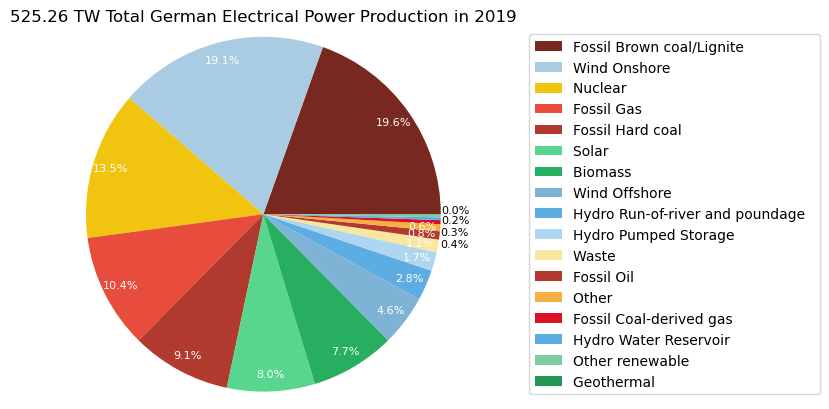

In [136]:
pie_plot(df_y_prod, 2019)

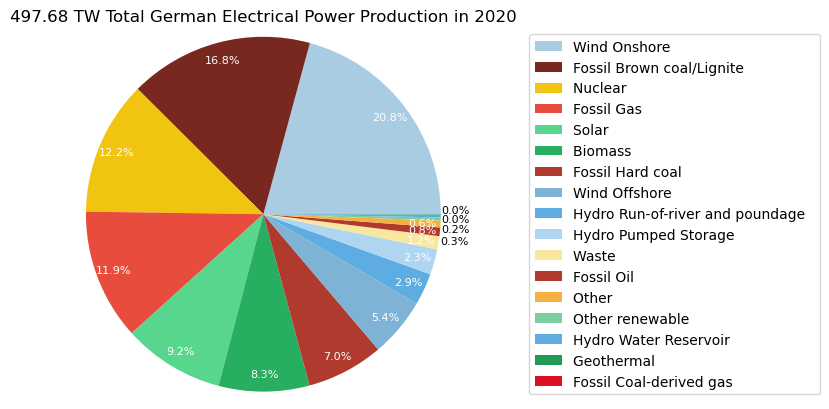

In [108]:
pie_plot(df_y_prod, 2020)

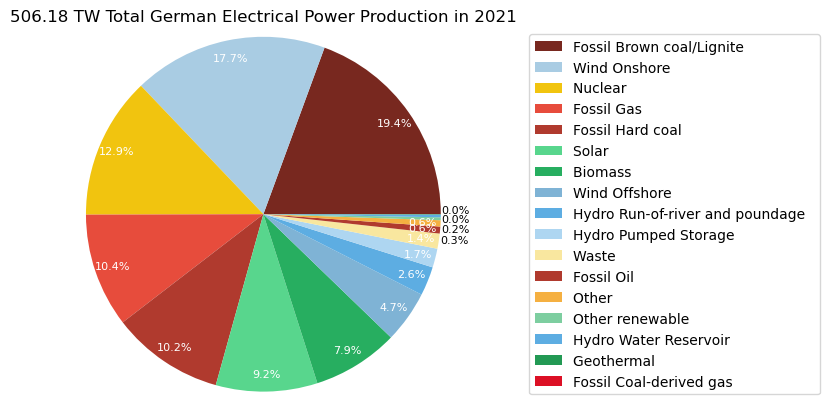

In [109]:
pie_plot(df_y_prod, 2021)

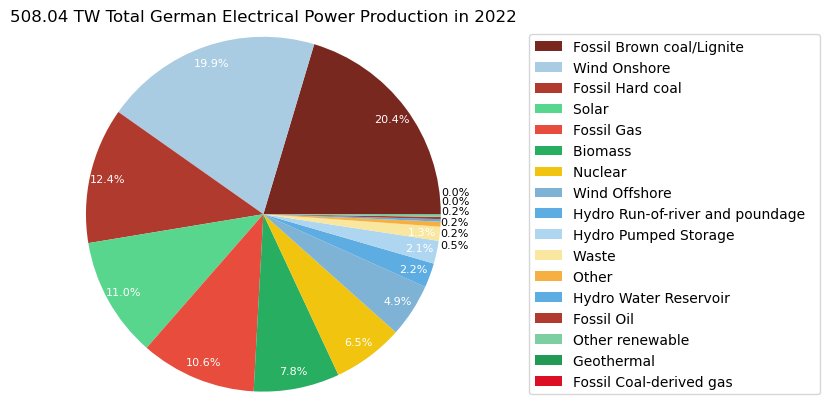

In [110]:
pie_plot(df_y_prod, 2022)

In [219]:
# Show the data 
df_y_prod

Time_Start  Weekday  Load Forecast Day-ahead  in MW  Actual Load in MW  \
0 2019-12-31     3.99                  483,314,258.00     502,400,048.38   
1 2020-12-31     4.00                  479,934,030.25     490,189,578.62   
2 2021-12-31     4.00                  493,135,643.88     509,614,846.75   
3 2022-12-31     4.01                  491,746,987.25     487,243,010.88   
4 2023-12-31     4.00                  102,069,592.75      99,278,943.75   

   Day-ahead Price in EUR/MWh  Biomass  - Actual Aggregated in MW  \
0                       37.94                       40,554,780.25   
1                       30.40                       41,089,887.62   
2                       98.35                       39,744,756.50   
3                      237.54                       39,753,547.50   
4                      151.67                        8,345,792.08   

   Fossil Brown coal/Lignite  - Actual Aggregated in MW  \
0                                     102,723,707.88      
1                                      83,369,709.25      
2                                      98,193,126.38      
3                                     103,514,403.62      
4                                      19,536,258.33      

   Fossil Coal-derived gas  - Actual Aggregated in MW  \
0                                       1,954,566.50    
1                                               0.00    
2                                               0.00    
3                                               0.00    
4                                               0.00    

   Fossil Gas  - Actual Aggregated in MW  \
0                          54,860,176.75   
1                          59,343,363.50   
2                          52,624,522.00   
3                          53,622,748.75   
4                          12,934,165.25   

   Fossil Hard coal  - Actual Aggregated in MW  ...  \
0                                47,814,025.00  ...   
1                                34,870,467.75  ...   
2                                51,839,700.75  ...   
3                                62,893,250.25  ...   
4                                14,228,623.08  ...   

   Hydro Pumped Storage  - Actual Aggregated in MW  \
0                                     9,018,955.25   
1                                    11,526,987.50   
2                                     8,721,430.00   
3                                    10,603,255.00   
4                                     2,252,147.58   

   Hydro Run-of-river and poundage  - Actual Aggregated in MW  \
0                                      14,594,302.25            
1                                      14,431,505.50            
2                                      13,353,513.25            
3                                      11,304,273.62            
4                                       2,067,374.25            

   Hydro Water Reservoir  - Actual Aggregated in MW  \
0                                      1,327,978.25   
1                                      1,229,485.38   
2                                      1,195,621.75   
3                                      1,133,806.00   
4                                        120,494.08   

   Nuclear  - Actual Aggregated in MW  Other  - Actual Aggregated in MW  \
0                       71,035,469.38                      3,328,137.50   
1                       60,917,276.12                      3,098,619.50   
2                       65,398,732.25                      2,891,956.25   
3                       32,821,374.88                      2,303,026.75   
4                        4,549,255.67                        438,974.00   

   Other renewable  - Actual Aggregated in MW  \
0                                1,282,937.25   
1                                1,409,783.75   
2                                1,335,976.75   
3                                1,028,922.88   
4                                  236,013.58   

   Solar  - Actual Aggregated in MW  Waste 

In [111]:
# Increase or Decrease function
def crease(delta):
    if delta < 0:
        chg = 'Decreased'
    else:
        chg = 'Increased' 
    return chg

In [137]:
# Select the difference between the years, default is all. 
def y1_over_y2_change(df_y_prod, year1, year2):
    #Load the rows of dataframe which should be compared
    df_y1_prod = df_y_prod[(pd.DatetimeIndex(df_y_prod['Time_Start']).year == year1)]
    df_y2_prod = df_y_prod[(pd.DatetimeIndex(df_y_prod['Time_Start']).year == year2)]
    # combine them 
    df_y_prod_diff = pd.concat([df_y1_prod, df_y2_prod]).reset_index(drop=True)
   
    # Calculate the difference between the lines. Remember row 0 will have NaN values
    df_y_prod_diff = df_y_prod_diff.diff()
    
    # Take out price delta so that this column can be droped afterwards
    delta_price = df_y_prod_diff.at[df_y_prod_diff.index[1], 'Day-ahead Price in EUR/MWh']

    # Drop unneeded columns
    df_y_prod_diff = df_y_prod_diff.drop(['Time_Start', 'Weekday', 'Load Forecast Day-ahead  in MW', 'Actual Load in MW', 'Day-ahead Price in EUR/MWh'], axis=1)
    
    # Perform add_col(df) function to define colors for plots
    df_y_prod_diff = add_col(df_y_prod_diff)
    
    # Replace to make it easier read.
    df_y_prod_diff.columns = df_y_prod_diff.columns.str.replace('- Actual Aggregated in MW', '', regex=True)
    
    # Transpose and than drope second column
    df_y_prod_diff = df_y_prod_diff.transpose()
    df_y_prod_diff = df_y_prod_diff.drop(1, axis=1)
    
    # Change unit from MW to TW 
    prod_change = df_y_prod_diff[2].sum()*1e-6
    df_y_prod_diff[2] = df_y_prod_diff[2]*1e-6

    # Pot bar chart
    plt.figure(figsize=(20,5))
    plt.title('Overall Production {} by {:.2f} TW between {} and {} by a price {} by {:.2f} MWh/EUR.\nListed by production type.'.format(crease(prod_change), prod_change, year1, year2, crease(delta_price), delta_price), fontsize=20)
    plt.bar(df_y_prod_diff.index, df_y_prod_diff[2], color=df_y_prod_diff[0])
    plt.xticks(rotation=90);
    plt.ylabel('TW')

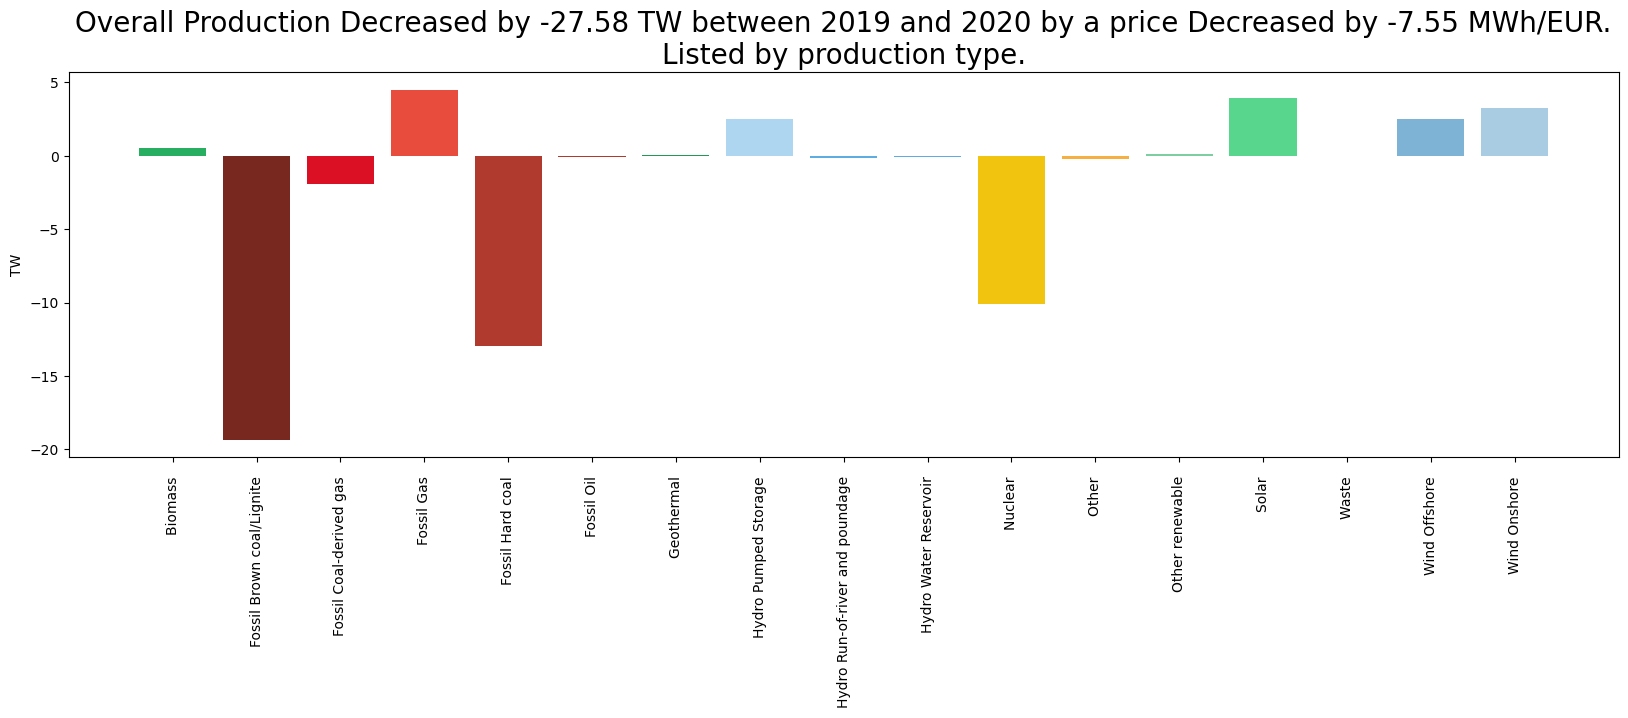

In [138]:
y1_over_y2_change(df_y_prod, 2019, 2020)

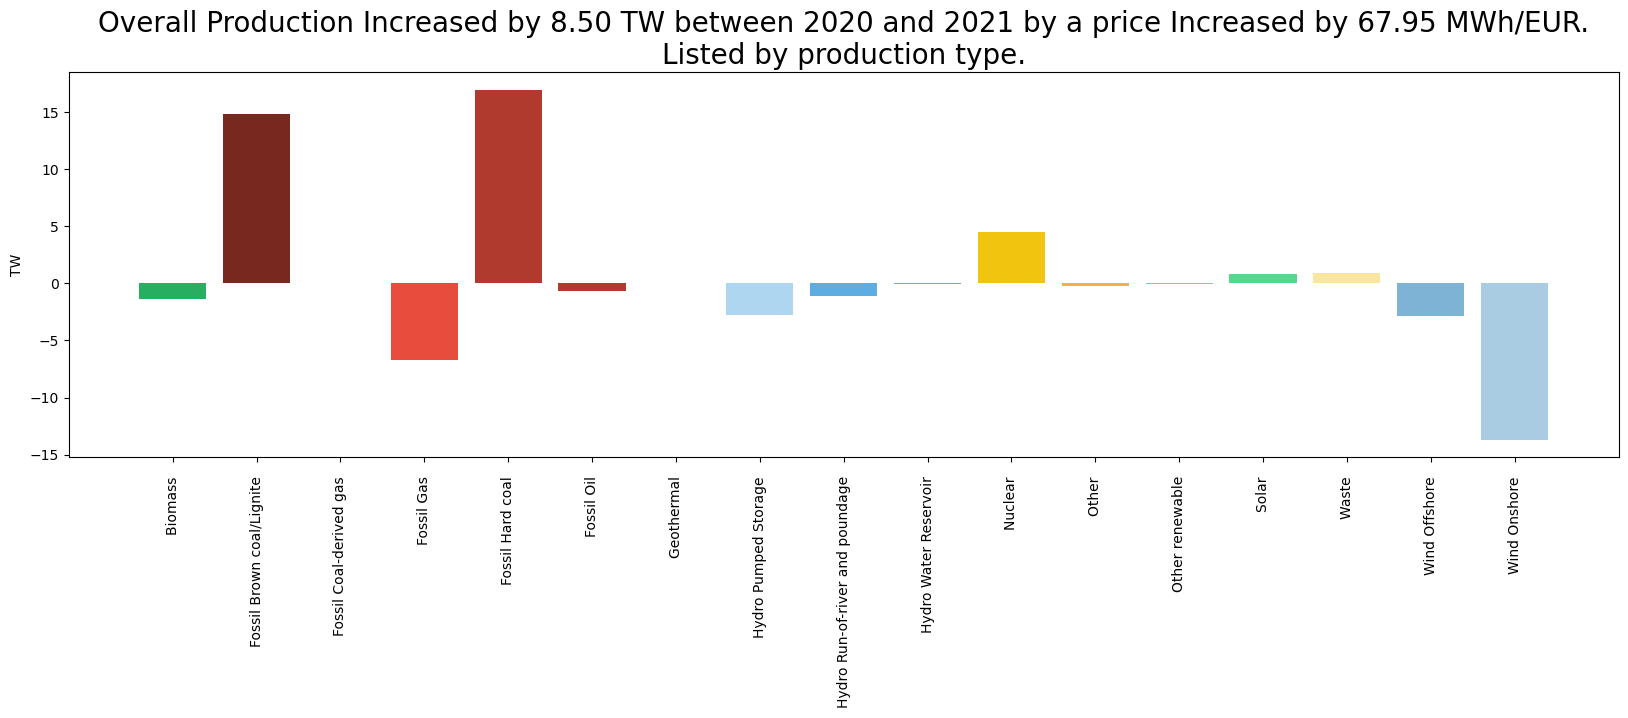

In [139]:
y1_over_y2_change(df_y_prod, 2020, 2021)

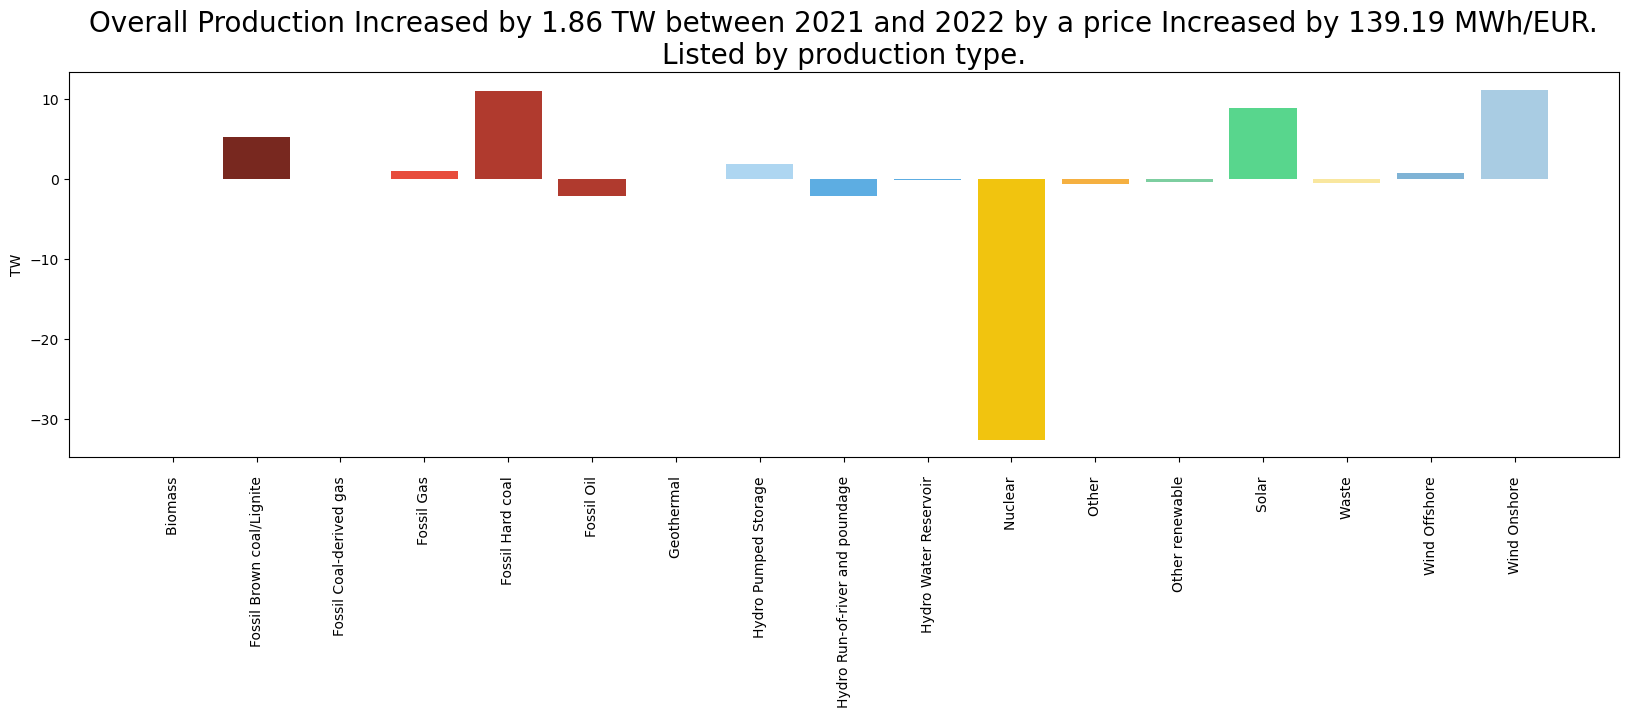

In [140]:
y1_over_y2_change(df_y_prod, 2021, 2022)


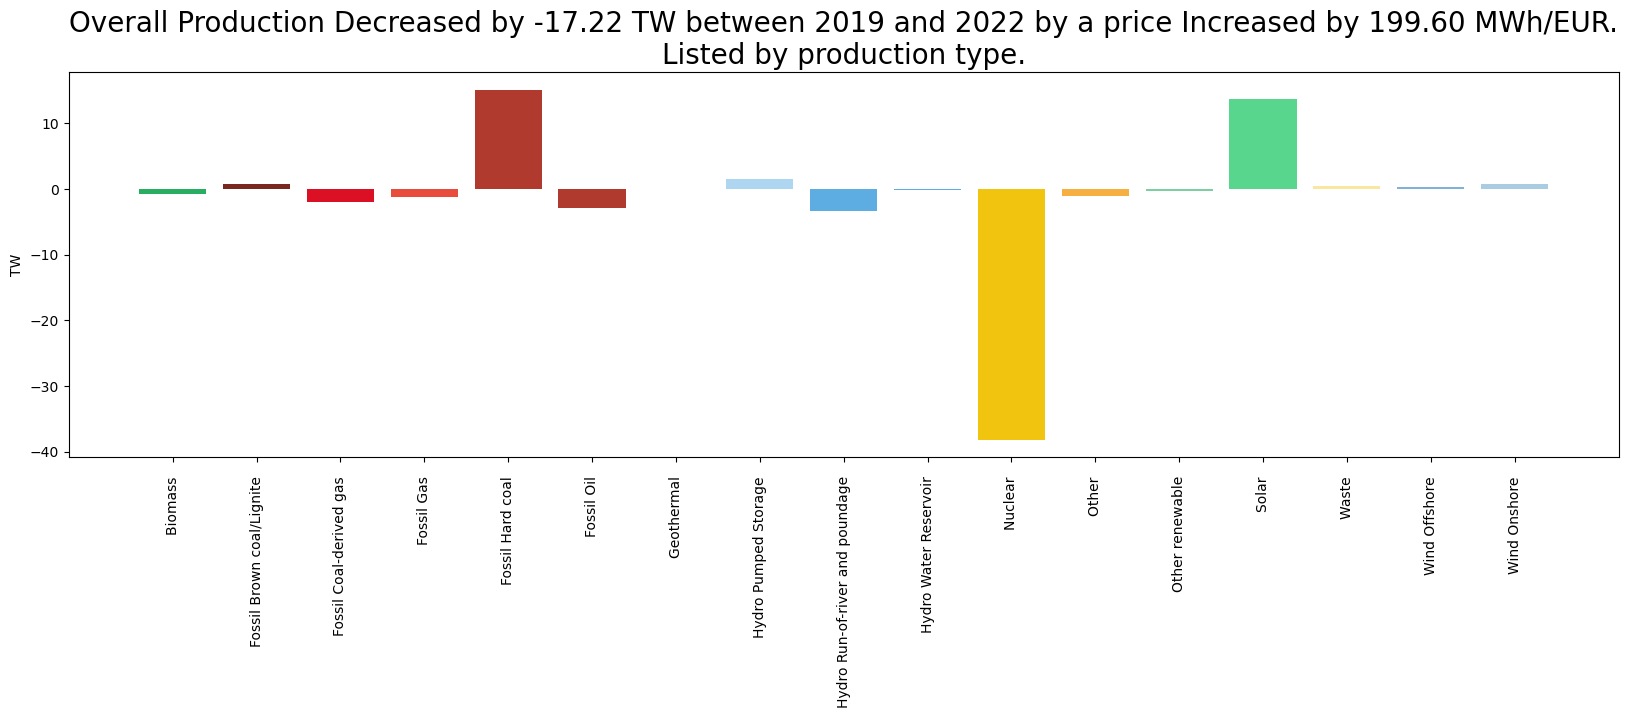

In [141]:
y1_over_y2_change(df_y_prod, 2019, 2022)

In [118]:
df['Actual Load in MW'].min()

29884.0

In [121]:
df['Actual Load in MW'].diff().min()

-11630.0

In [119]:
df['Actual Load in MW'].max()

82170.0

In [120]:
df['Actual Load in MW'].diff().max()

11095.0

In [ ]:
# https://plotly.com/python/pie-charts/
# https://www.smard.de/page/en/topic-article/5892/206870 
### Calculations show fit. Day-Ahead price is different to real price because of shorttime demandes and overloades